In [1]:
import pandas as pd
import compare_outcomes as co

In [2]:
actual_2024 = co.prep_bts('2024-01-28', '2024-01-28', '../db/truth/T_ONTIME_REPORTING_2024.csv')
actual_2024.reset_index(names='id', inplace=True)

/home/michael/code/recovair-abm/validation/compare_outcomes.py:35: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


In [5]:
sim = pd.read_csv(f'../results-2024-01-28-flights.csv')
sim['arr_time'] = pd.to_datetime(sim['arr_time'], utc=True)
sim['sched_arr'] = pd.to_datetime(sim['sched_arr'], utc=True)
sim['sched_dep'] = pd.to_datetime(sim['sched_dep'], utc=True)
sim['dep_time'] = pd.to_datetime(sim['dep_time'], utc=True)
comp2024 = co.OutcomeComparison(actual_2024, sim)
print('otp', comp2024.compare_otp())
print('delay', comp2024.compare_total_delay())
print('cancel', comp2024.compare_num_cancellations())
print('flight hours', comp2024.compare_total_hours_flown())

sim = pd.read_csv(f'../results-2024-01-28-nodisrupt-flights.csv')
sim['arr_time'] = pd.to_datetime(sim['arr_time'], utc=True)
sim['sched_arr'] = pd.to_datetime(sim['sched_arr'], utc=True)
sim['sched_dep'] = pd.to_datetime(sim['sched_dep'], utc=True)
sim['dep_time'] = pd.to_datetime(sim['dep_time'], utc=True)
comp2024_nodisrupt = co.OutcomeComparison(actual_2024, sim)
print('otp', comp2024_nodisrupt.compare_otp())
print('delay', comp2024_nodisrupt.compare_total_delay())
print('cancel', comp2024_nodisrupt.compare_num_cancellations())
print('flight hours', comp2024_nodisrupt.compare_total_hours_flown())

sim = pd.read_csv(f'../results-2024-01-28-aircraftdfs-flights.csv')
sim['arr_time'] = pd.to_datetime(sim['arr_time'], utc=True)
sim['sched_arr'] = pd.to_datetime(sim['sched_arr'], utc=True)
sim['sched_dep'] = pd.to_datetime(sim['sched_dep'], utc=True)
sim['dep_time'] = pd.to_datetime(sim['dep_time'], utc=True)
comp2024_dfs = co.OutcomeComparison(actual_2024, sim)
print('otp', comp2024_dfs.compare_otp())
print('delay', comp2024_dfs.compare_total_delay())
print('cancel', comp2024_dfs.compare_num_cancellations())
print('flight hours', comp2024_dfs.compare_total_hours_flown())

sim = pd.read_csv(f'../results-2024-01-28-nodisrupt-aircraftdfs-flights.csv')
sim['arr_time'] = pd.to_datetime(sim['arr_time'], utc=True)
sim['sched_arr'] = pd.to_datetime(sim['sched_arr'], utc=True)
sim['sched_dep'] = pd.to_datetime(sim['sched_dep'], utc=True)
sim['dep_time'] = pd.to_datetime(sim['dep_time'], utc=True)
comp2024_dfs_nodisrupt = co.OutcomeComparison(actual_2024, sim)
print('otp', comp2024_dfs_nodisrupt.compare_otp())
print('delay', comp2024_dfs_nodisrupt.compare_total_delay())
print('cancel', comp2024_dfs_nodisrupt.compare_num_cancellations())
print('flight hours', comp2024_dfs_nodisrupt.compare_total_hours_flown())


otp {'actual': 0.8657701091093631, 'sim': 0.14970819588936818}
delay {'actual': 21528.0, 'sim': 276856.0}
cancel {'actual': 0.0, 'sim': 730}
flight hours {'actual': 8028.033333333334, 'sim': 7129.033333333334}
otp {'actual': 0.8657701091093631, 'sim': 0.9840142095914742}
delay {'actual': 21528.0, 'sim': 2615.0}
cancel {'actual': 0.0, 'sim': 4}
flight hours {'actual': 8028.033333333334, 'sim': 8554.416666666666}
otp {'actual': 0.8657701091093631, 'sim': 0.15046942400405988}
delay {'actual': 21528.0, 'sim': 282310.0}
cancel {'actual': 0.0, 'sim': 787}
flight hours {'actual': 8028.033333333334, 'sim': 6987.5}
otp {'actual': 0.8657701091093631, 'sim': 0.9789393554935295}
delay {'actual': 21528.0, 'sim': 2940.0}
cancel {'actual': 0.0, 'sim': 30}
flight hours {'actual': 8028.033333333334, 'sim': 8496.25}


In [6]:
actual_2022 = co.prep_bts('2022-12-22', '2022-12-22', '../db/truth/T_ONTIME_REPORTING_2022.csv')
actual_2022.reset_index(names='id', inplace=True)

/home/michael/code/recovair-abm/validation/compare_outcomes.py:16: DtypeWarning: Columns (21) have mixed types. Specify dtype option on import or set low_memory=False.
/home/michael/code/recovair-abm/validation/compare_outcomes.py:35: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


In [43]:
sim = pd.read_csv(f'../results-2022-12-22-flights.csv')
sim['arr_time'] = pd.to_datetime(sim['arr_time'], utc=True)
sim['sched_arr'] = pd.to_datetime(sim['sched_arr'], utc=True)
sim['sched_dep'] = pd.to_datetime(sim['sched_dep'], utc=True)
sim['dep_time'] = pd.to_datetime(sim['dep_time'], utc=True)
comp2022 = co.OutcomeComparison(actual_2022, sim)
print('otp', comp2022.compare_otp())
print('delay', comp2022.compare_total_delay())
print('cancel', comp2022.compare_num_cancellations())
print('flight hours', comp2022.compare_total_hours_flown())

sim = pd.read_csv(f'../results-2022-12-22-nodisrupt-flights.csv')
sim['arr_time'] = pd.to_datetime(sim['arr_time'], utc=True)
sim['sched_arr'] = pd.to_datetime(sim['sched_arr'], utc=True)
sim['sched_dep'] = pd.to_datetime(sim['sched_dep'], utc=True)
sim['dep_time'] = pd.to_datetime(sim['dep_time'], utc=True)
comp2022_nodisrupt = co.OutcomeComparison(actual_2022, sim)
print('otp', comp2022_nodisrupt.compare_otp())
print('delay', comp2022_nodisrupt.compare_total_delay())
print('cancel', comp2022_nodisrupt.compare_num_cancellations())
print('flight hours', comp2022_nodisrupt.compare_total_hours_flown())

sim = pd.read_csv(f'../results-2022-12-22-aircraftdfs-flights.csv')
sim['arr_time'] = pd.to_datetime(sim['arr_time'], utc=True)
sim['sched_arr'] = pd.to_datetime(sim['sched_arr'], utc=True)
sim['sched_dep'] = pd.to_datetime(sim['sched_dep'], utc=True)
sim['dep_time'] = pd.to_datetime(sim['dep_time'], utc=True)
comp2022_dfs = co.OutcomeComparison(actual_2022, sim)
print('otp', comp2022_dfs.compare_otp())
print('delay', comp2022_dfs.compare_total_delay())
print('cancel', comp2022_dfs.compare_num_cancellations())
print('flight hours', comp2022_dfs.compare_total_hours_flown())

sim = pd.read_csv(f'../results-2022-12-22-nodisrupt-aircraftdfs-flights.csv')
sim['arr_time'] = pd.to_datetime(sim['arr_time'], utc=True)
sim['sched_arr'] = pd.to_datetime(sim['sched_arr'], utc=True)
sim['sched_dep'] = pd.to_datetime(sim['sched_dep'], utc=True)
sim['dep_time'] = pd.to_datetime(sim['dep_time'], utc=True)
comp2022_dfs_nodisrupt = co.OutcomeComparison(actual_2022, sim)
print('otp', comp2022_dfs_nodisrupt.compare_otp())
print('delay', comp2022_dfs_nodisrupt.compare_total_delay())
print('cancel', comp2022_dfs_nodisrupt.compare_num_cancellations())
print('flight hours', comp2022_dfs_nodisrupt.compare_total_hours_flown())

otp {'actual': 0.28586013272077593, 'sim': 0.07835630423685554}
delay {'actual': 154511.0, 'sim': 316335.0}
cancel {'actual': 1026.0, 'sim': 1556}
flight hours {'actual': 5942.416666666667, 'sim': 5090.916666666667}
otp {'actual': 0.28586013272077593, 'sim': 0.934660541092394}
delay {'actual': 154511.0, 'sim': 16595.0}
cancel {'actual': 1026.0, 'sim': 2}
flight hours {'actual': 5942.416666666667, 'sim': 8291.25}
otp {'actual': 0.28586013272077593, 'sim': 0.08499234303215926}
delay {'actual': 154511.0, 'sim': 242321.0}
cancel {'actual': 1026.0, 'sim': 1818}
flight hours {'actual': 5942.416666666667, 'sim': 4468.15}
otp {'actual': 0.28586013272077593, 'sim': 0.7616130678917815}
delay {'actual': 154511.0, 'sim': 11270.0}
cancel {'actual': 1026.0, 'sim': 833}
flight hours {'actual': 5942.416666666667, 'sim': 6515.25}


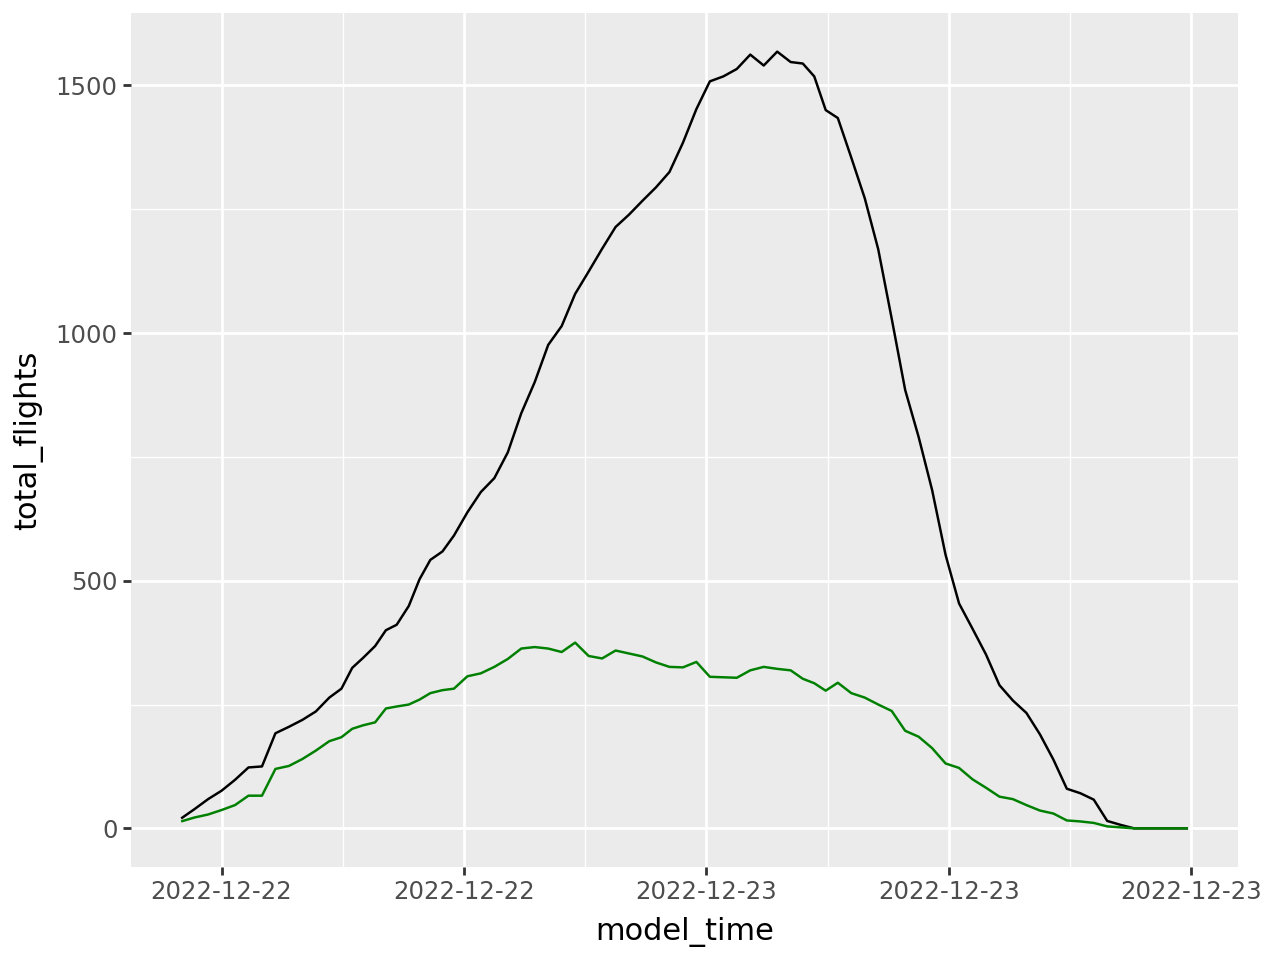

In [9]:
dfs_stats = pd.read_csv('../test_log_12-22-aircraftdfs-dfs-stats.csv')
dfs_stats['model_time'] = pd.to_datetime(dfs_stats['model_time'])
from plotnine import *
ggplot(dfs_stats) + geom_line(aes(x='model_time', y='total_flights')) + geom_line(aes(x='model_time', y='flights_reserved'), color='green')

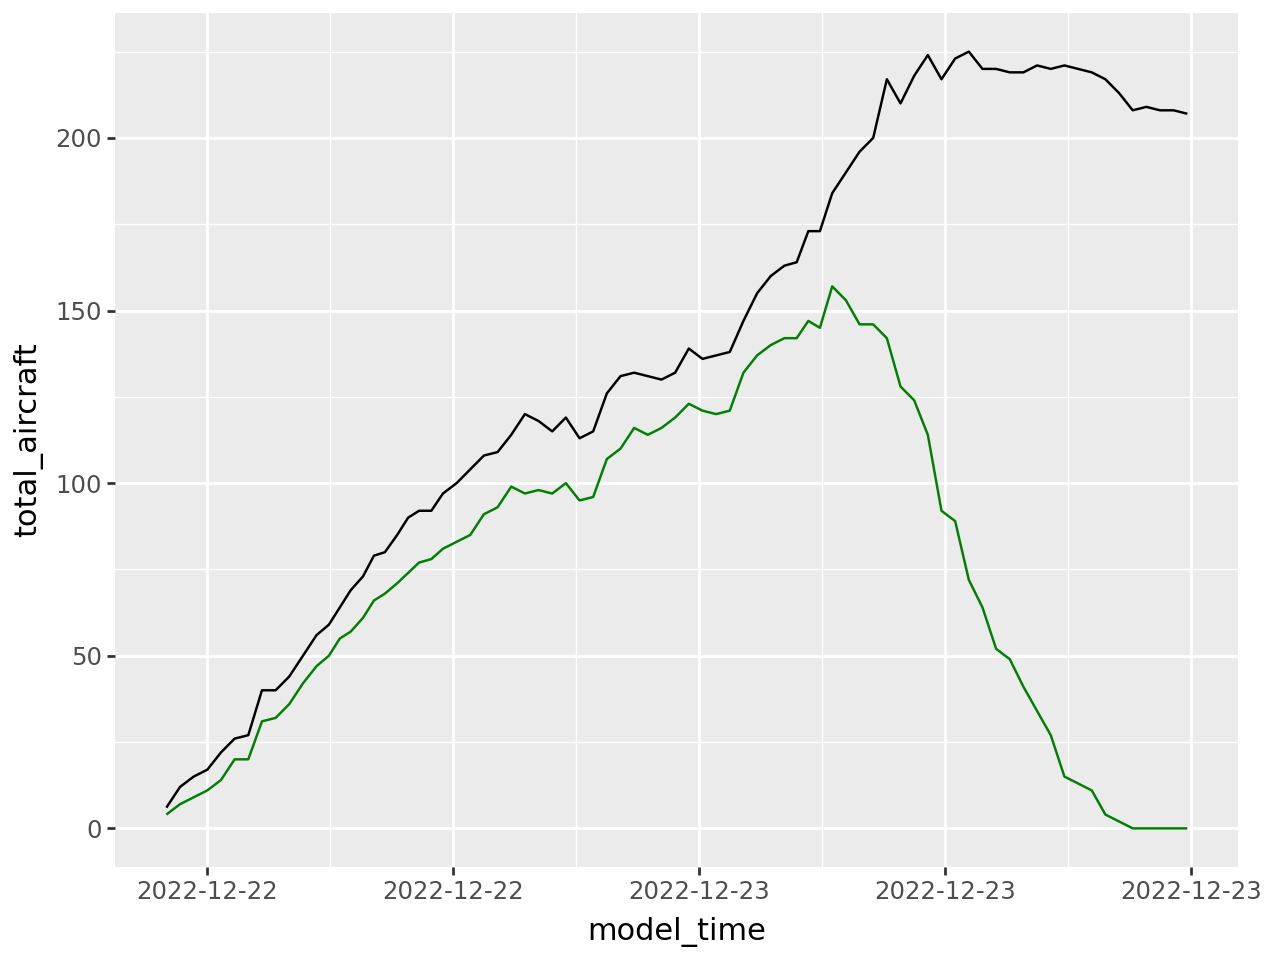

In [93]:

ggplot(dfs_stats) + geom_line(aes(x='model_time', y='total_aircraft')) + geom_line(aes(x='model_time', y='aircraft_with_string'), color='green')

In [65]:
sim.query('tail == "N425LV"').sort_values('sched_dep')

,id,flight_number,tail,crew,passengers,origin,dest,CANCELLED,dep_time,arr_time,sched_dep,sched_arr,ARR_DELAY,DEP_DELAY
2149,397237,2276,N425LV,918.0,143,LGB,SMF,0,2022-12-22 16:30:00+00:00,2022-12-22 17:55:00+00:00,2022-12-22 16:25:00+00:00,2022-12-22 17:50:00+00:00,5.0,5.0
3907,397242,3341,N425LV,918.0,143,SMF,LAS,0,2022-12-22 18:35:00+00:00,2022-12-22 19:55:00+00:00,2022-12-22 18:25:00+00:00,2022-12-22 19:45:00+00:00,10.0,10.0
919,397241,3341,N425LV,910.0,35,LAS,BZN,0,2022-12-22 20:42:00+00:00,2022-12-22 22:47:00+00:00,2022-12-22 20:30:00+00:00,2022-12-22 22:35:00+00:00,12.0,12.0
694,397238,3081,N425LV,1112.0,0,BZN,DEN,1,NaT,NaT,2022-12-22 23:30:00+00:00,2022-12-23 01:10:00+00:00,NaN,NaN
1095,397124,1773,N425LV,807.0,0,SJC,SEA,1,NaT,NaT,2022-12-23 02:05:00+00:00,2022-12-23 04:20:00+00:00,NaN,NaN


In [66]:
sim.set_index('id').loc[[398310, 397499, 397124]]

,flight_number,tail,crew,passengers,origin,dest,CANCELLED,dep_time,arr_time,sched_dep,sched_arr,ARR_DELAY,DEP_DELAY
id,,,,,,,,,,,,,
398310,2333,N419WN,1112.0,16,BZN,LAS,0,2022-12-23 03:25:00+00:00,2022-12-23 05:25:00+00:00,2022-12-23 02:55:00+00:00,2022-12-23 04:55:00+00:00,30.0,30.0
397499,1620,N8582Z,35.0,0,LAS,SJC,1,NaT,NaT,2022-12-23 04:15:00+00:00,2022-12-23 05:40:00+00:00,NaN,NaN
397124,1773,N425LV,807.0,0,SJC,SEA,1,NaT,NaT,2022-12-23 02:05:00+00:00,2022-12-23 04:20:00+00:00,NaN,NaN


In [49]:
delay_cancel_df_data = []
for delay_tolerance in [10, 30, *range(60, 361, 60)]:
    sim = pd.read_csv(f'../results-2024-01-28_{delay_tolerance}-flights.csv')
    sim['arr_time'] = pd.to_datetime(sim['arr_time'], utc=True)
    sim['sched_arr'] = pd.to_datetime(sim['sched_arr'], utc=True)
    sim['sched_dep'] = pd.to_datetime(sim['sched_dep'], utc=True)
    sim['dep_time'] = pd.to_datetime(sim['dep_time'], utc=True)
    comp_delay = co.OutcomeComparison(comp2024.actual, sim)
    print(delay_tolerance, 'otp', comp_delay.compare_otp())
    print(delay_tolerance, 'delay', comp_delay.compare_total_delay())
    print(delay_tolerance, 'cancel', comp_delay.compare_num_cancellations())
    delay_cancel_df_data.append({
        'delay_tolerance': delay_tolerance,
        'otp': comp_delay.compare_otp()['sim'],
        'delay': comp_delay.compare_total_delay()['sim'],
        'cancel': comp_delay.compare_num_cancellations()['sim']
    })
delay_cancel_df = pd.DataFrame(delay_cancel_df_data)
delay_cancel_df

delay_cancel_df_data = []
for delay_tolerance in [10, 30, *range(60, 361, 60)]:
    sim = pd.read_csv(f'../results-2024-01-28-aircraftdfs_{delay_tolerance}-flights.csv')
    sim['arr_time'] = pd.to_datetime(sim['arr_time'], utc=True)
    sim['sched_arr'] = pd.to_datetime(sim['sched_arr'], utc=True)
    sim['sched_dep'] = pd.to_datetime(sim['sched_dep'], utc=True)
    sim['dep_time'] = pd.to_datetime(sim['dep_time'], utc=True)
    comp_delay = co.OutcomeComparison(comp2024.actual, sim)
    print(delay_tolerance, 'otp', comp_delay.compare_otp())
    print(delay_tolerance, 'delay', comp_delay.compare_total_delay())
    print(delay_tolerance, 'cancel', comp_delay.compare_num_cancellations())
    delay_cancel_df_data.append({
        'delay_tolerance': delay_tolerance,
        'otp': comp_delay.compare_otp()['sim'],
        'delay': comp_delay.compare_total_delay()['sim'],
        'cancel': comp_delay.compare_num_cancellations()['sim']
    })
delay_cancel_dfs_df = pd.DataFrame(delay_cancel_df_data)
delay_cancel_dfs_df

10 otp {'actual': 0.8657701091093631, 'sim': 0.6173560010149708}
10 delay {'actual': 21528.0, 'sim': 3009.0}
10 cancel {'actual': 0.0, 'sim': 1505}
30 otp {'actual': 0.8657701091093631, 'sim': 0.5668612027404212}
30 delay {'actual': 21528.0, 'sim': 22693.0}
30 cancel {'actual': 0.0, 'sim': 965}
60 otp {'actual': 0.8657701091093631, 'sim': 0.35625475767571685}
60 delay {'actual': 21528.0, 'sim': 58951.0}
60 cancel {'actual': 0.0, 'sim': 896}
120 otp {'actual': 0.8657701091093631, 'sim': 0.19182948490230906}
120 delay {'actual': 21528.0, 'sim': 135218.0}
120 cancel {'actual': 0.0, 'sim': 905}
180 otp {'actual': 0.8657701091093631, 'sim': 0.16188784572443543}
180 delay {'actual': 21528.0, 'sim': 197571.0}
180 cancel {'actual': 0.0, 'sim': 840}
240 otp {'actual': 0.8657701091093631, 'sim': 0.15173813752854606}
240 delay {'actual': 21528.0, 'sim': 235319.0}
240 cancel {'actual': 0.0, 'sim': 768}
300 otp {'actual': 0.8657701091093631, 'sim': 0.14894696777467648}
300 delay {'actual': 21528.0,

,delay_tolerance,otp,delay,cancel
0,10,0.514844,2254.0,1910
1,30,0.531845,17442.0,1283
2,60,0.345598,49810.0,1216
3,120,0.192337,121553.0,1154
4,180,0.163918,183944.0,1031
5,240,0.156559,229618.0,898
6,300,0.153768,264411.0,841
7,360,0.150216,283675.0,790


In [56]:
delay_cancel_df_data = []
for delay_tolerance in [10, 30, *range(60, 361, 60)]:
    sim = pd.read_csv(f'../results-2022-12-22_{delay_tolerance}-flights.csv')
    sim['arr_time'] = pd.to_datetime(sim['arr_time'], utc=True)
    sim['sched_arr'] = pd.to_datetime(sim['sched_arr'], utc=True)
    sim['sched_dep'] = pd.to_datetime(sim['sched_dep'], utc=True)
    sim['dep_time'] = pd.to_datetime(sim['dep_time'], utc=True)
    comp_delay = co.OutcomeComparison(comp2022.actual, sim)
    print(delay_tolerance, 'otp', comp_delay.compare_otp())
    print(delay_tolerance, 'delay', comp_delay.compare_total_delay())
    print(delay_tolerance, 'cancel', comp_delay.compare_num_cancellations())
    delay_cancel_df_data.append({
        'delay_tolerance': delay_tolerance,
        'otp': comp_delay.compare_otp()['sim'],
        'delay': comp_delay.compare_total_delay()['sim'],
        'cancel': comp_delay.compare_num_cancellations()['sim']
    })
delay_cancel_df = pd.DataFrame(delay_cancel_df_data)
delay_cancel_df

delay_cancel_df_data = []
for delay_tolerance in [10, 30, *range(60, 361, 60)]:
    sim = pd.read_csv(f'../results-2022-12-22-aircraftdfs_{delay_tolerance}-flights.csv')
    sim['arr_time'] = pd.to_datetime(sim['arr_time'], utc=True)
    sim['sched_arr'] = pd.to_datetime(sim['sched_arr'], utc=True)
    sim['sched_dep'] = pd.to_datetime(sim['sched_dep'], utc=True)
    sim['dep_time'] = pd.to_datetime(sim['dep_time'], utc=True)
    comp_delay = co.OutcomeComparison(comp2022.actual, sim)
    print(delay_tolerance, 'otp', comp_delay.compare_otp())
    print(delay_tolerance, 'delay', comp_delay.compare_total_delay())
    print(delay_tolerance, 'cancel', comp_delay.compare_num_cancellations())
    delay_cancel_df_data.append({
        'delay_tolerance': delay_tolerance,
        'otp': comp_delay.compare_otp()['sim'],
        'delay': comp_delay.compare_total_delay()['sim'],
        'cancel': comp_delay.compare_num_cancellations()['sim']
    })
delay_cancel_dfs_df = pd.DataFrame(delay_cancel_df_data)
delay_cancel_dfs_df

10 otp {'actual': 0.28586013272077593, 'sim': 0.37059724349157736}
10 delay {'actual': 154511.0, 'sim': 2022.0}
10 cancel {'actual': 1026.0, 'sim': 2466}
30 otp {'actual': 0.28586013272077593, 'sim': 0.3044920877998979}
30 delay {'actual': 154511.0, 'sim': 18608.0}
30 cancel {'actual': 1026.0, 'sim': 2042}
60 otp {'actual': 0.28586013272077593, 'sim': 0.16462480857580397}
60 delay {'actual': 154511.0, 'sim': 53071.0}
60 cancel {'actual': 1026.0, 'sim': 1864}
120 otp {'actual': 0.28586013272077593, 'sim': 0.09494640122511486}
120 delay {'actual': 154511.0, 'sim': 123875.0}
120 cancel {'actual': 1026.0, 'sim': 1721}
180 otp {'actual': 0.28586013272077593, 'sim': 0.08218478815722308}
180 delay {'actual': 154511.0, 'sim': 184475.0}
180 cancel {'actual': 1026.0, 'sim': 1677}
240 otp {'actual': 0.28586013272077593, 'sim': 0.07835630423685554}
240 delay {'actual': 154511.0, 'sim': 242527.0}
240 cancel {'actual': 1026.0, 'sim': 1597}
300 otp {'actual': 0.28586013272077593, 'sim': 0.07452782031

,delay_tolerance,otp,delay,cancel
0,10,0.322358,1734.0,2655
1,30,0.290199,14393.0,2279
2,60,0.169729,40951.0,2110
3,120,0.098264,93462.0,2035
4,180,0.091628,140488.0,2004
5,240,0.083971,185950.0,1942
6,300,0.082950,215202.0,1874
7,360,0.086013,245351.0,1804


/home/michael/code/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


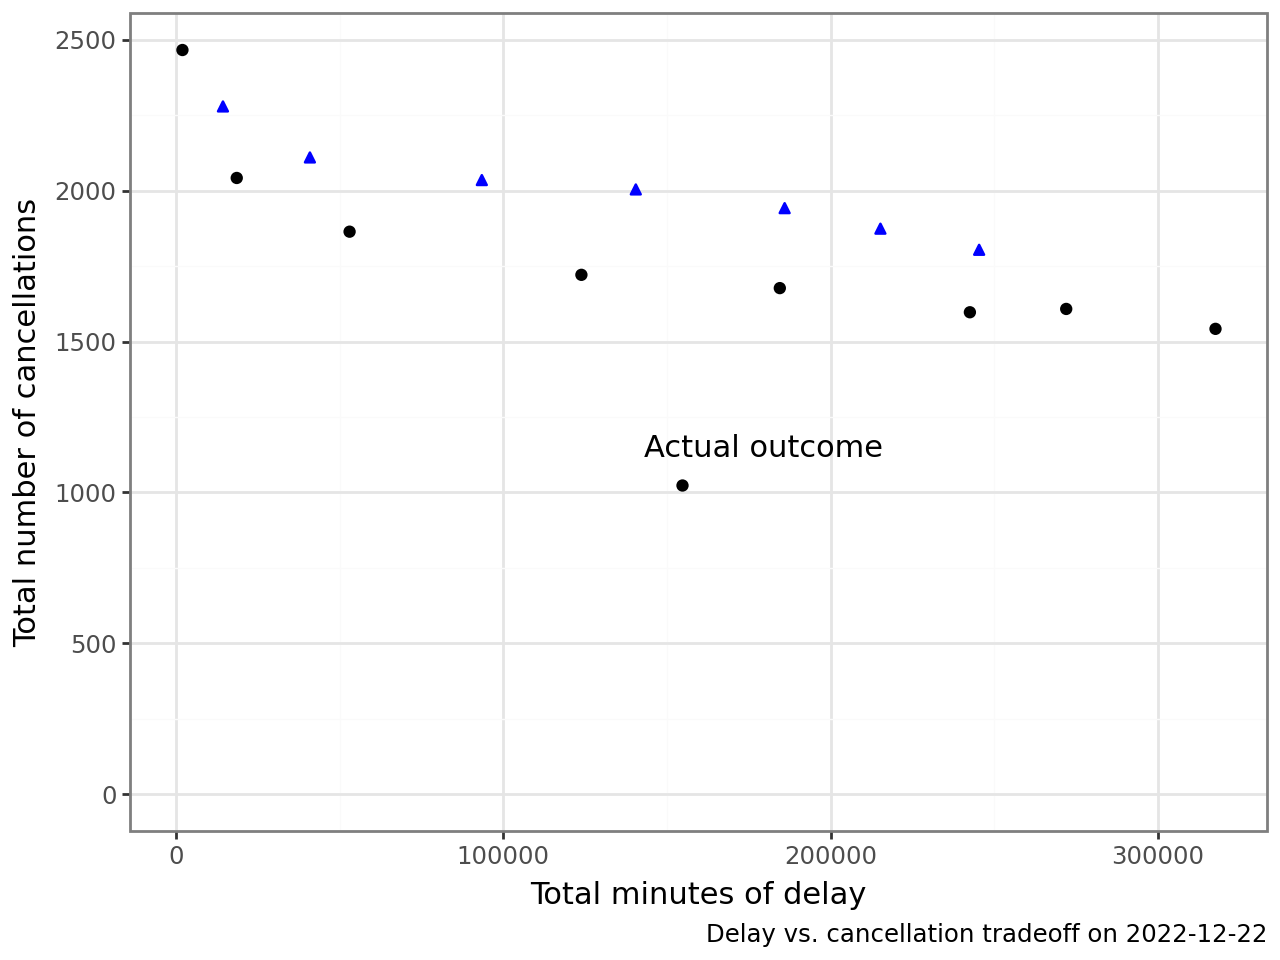

In [58]:
co.pn.ggplot(delay_cancel_df)\
    + co.pn.geom_point(co.pn.aes(x='delay', y='cancel'))\
    + co.pn.geom_point(data=delay_cancel_dfs_df, mapping=co.pn.aes(x='delay', y='cancel'), shape='^', color='blue')\
    + co.pn.annotate(geom='point', x=comp2022.compare_total_delay()['actual'], y=comp2022.compare_num_cancellations()['actual'], color='black')\
    + co.pn.annotate(geom='text', x=comp2022.compare_total_delay()['actual']+25000, y=comp2022.compare_num_cancellations()['actual']+120, label='Actual outcome')\
    + co.pn.ylim(0, delay_cancel_df['cancel'].max())\
    + co.pn.labs(x='Total minutes of delay', y='Total number of cancellations', caption='Delay vs. cancellation tradeoff on 2022-12-22', colour='Max delay per flight')\
    + co.pn.theme_bw()

In [59]:
ggsave(_, f'plots/2022-tradeoff.pdf', width=5, height=3)


/home/michael/code/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 5 x 3 in image.
/home/michael/code/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: plots/2022-tradeoff.pdf
/home/michael/code/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 1 rows containing missing values.


In [31]:
comp2024.simulated.query('id == 494942')

,id,flight_number,tail,crew,passengers,origin,dest,CANCELLED,dep_time,arr_time,sched_dep,sched_arr,ARR_DELAY,DEP_DELAY,duration
384,494942,2229,N8713M,1162.0,175,BWI,STL,0,2024-01-28 15:00:00+00:00,2024-01-28 17:30:00+00:00,2024-01-28 13:45:00+00:00,2024-01-28 16:15:00+00:00,75.0,75.0,0 days 02:30:00


In [36]:
comp2024.actual.query('id == 491823')

,id,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,ScheduledArrDateUTC,ScheduledArrHourUTC,ScheduledArrTimePacific,ScheduledArrDatePacific,ScheduledArrHourPacific,ActualDepTimeUTC,ActualArrTimeUTC,ActualDepHourUTC,ActualArrHourUTC,duration
688,491823,2024-01-28,WN,N428WN,941,SAV,BWI,1335,1357.0,22.0,...,2024-01-28,20,2024-01-28 12:10:00-08:00,2024-01-28,12,2024-01-28 18:57:00+00:00,2024-01-28 20:24:00+00:00,18,20,0 days 01:27:00


In [37]:
comp2024.actual.query('TAIL_NUM == "N428WN"').sort_values('ActualDepTimeUTC')

,id,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,ScheduledArrDateUTC,ScheduledArrHourUTC,ScheduledArrTimePacific,ScheduledArrDatePacific,ScheduledArrHourPacific,ActualDepTimeUTC,ActualArrTimeUTC,ActualDepHourUTC,ActualArrHourUTC,duration
687,491822,2024-01-28,WN,N428WN,941,DEN,BNA,620,618.0,-2.0,...,2024-01-28,15,2024-01-28 07:55:00-08:00,2024-01-28,7,2024-01-28 13:18:00+00:00,2024-01-28 15:39:00+00:00,13,15,0 days 02:21:00
685,491820,2024-01-28,WN,N428WN,941,BNA,SAV,1035,1034.0,-1.0,...,2024-01-28,18,2024-01-28 10:00:00-08:00,2024-01-28,10,2024-01-28 16:34:00+00:00,2024-01-28 17:49:00+00:00,16,17,0 days 01:15:00
688,491823,2024-01-28,WN,N428WN,941,SAV,BWI,1335,1357.0,22.0,...,2024-01-28,20,2024-01-28 12:10:00-08:00,2024-01-28,12,2024-01-28 18:57:00+00:00,2024-01-28 20:24:00+00:00,18,20,0 days 01:27:00
686,491821,2024-01-28,WN,N428WN,941,BWI,CMH,1600,1604.0,4.0,...,2024-01-28,22,2024-01-28 14:25:00-08:00,2024-01-28,14,2024-01-28 21:04:00+00:00,2024-01-28 22:13:00+00:00,21,22,0 days 01:09:00
684,491819,2024-01-28,WN,N428WN,777,CMH,BWI,1800,1751.0,-9.0,...,2024-01-29,0,2024-01-28 16:15:00-08:00,2024-01-28,16,2024-01-28 22:51:00+00:00,2024-01-29 00:01:00+00:00,22,0,0 days 01:10:00
683,491818,2024-01-28,WN,N428WN,777,BWI,JAX,1950,1948.0,-2.0,...,2024-01-29,2,2024-01-28 18:55:00-08:00,2024-01-28,18,2024-01-29 00:48:00+00:00,2024-01-29 02:46:00+00:00,0,2,0 days 01:58:00


In [38]:
comp2024.simulated.query('tail == "N428WN"').sort_values('dep_time')

,id,flight_number,tail,crew,passengers,origin,dest,CANCELLED,dep_time,arr_time,sched_dep,sched_arr,ARR_DELAY,DEP_DELAY,duration
3200,491822,941,N428WN,304.0,143,DEN,BNA,0,2024-01-28 13:21:00+00:00,2024-01-28 15:56:00+00:00,2024-01-28 13:20:00+00:00,2024-01-28 15:55:00+00:00,1.0,1.0,0 days 02:35:00
2899,491820,941,N428WN,663.0,143,BNA,SAV,0,2024-01-28 17:35:00+00:00,2024-01-28 19:00:00+00:00,2024-01-28 16:35:00+00:00,2024-01-28 18:00:00+00:00,60.0,60.0,0 days 01:25:00
894,491594,224,N428WN,1272.0,35,SAV,HOU,0,2024-01-28 20:55:00+00:00,2024-01-28 23:30:00+00:00,2024-01-28 19:45:00+00:00,2024-01-28 22:20:00+00:00,70.0,70.0,0 days 02:35:00
3043,492499,3629,N428WN,1272.0,64,HOU,ATL,0,2024-01-29 00:55:00+00:00,2024-01-29 02:45:00+00:00,2024-01-29 00:00:00+00:00,2024-01-29 01:50:00+00:00,55.0,55.0,0 days 01:50:00
2163,492893,3143,N428WN,1272.0,0,HOU,LGA,1,NaT,NaT,2024-01-28 23:30:00+00:00,2024-01-29 02:50:00+00:00,NaN,NaN,NaT


In [116]:
comp.very_different_depdelay()[['id', 'origin', 'dest', 'TAIL_NUM', 'tail', 'ActualDepTimeUTC', 'dep_time', 'ActualArrTimeUTC', 'arr_time']]

,id,origin,dest,TAIL_NUM,tail,ActualDepTimeUTC,dep_time,ActualArrTimeUTC,arr_time
3,491138,ITO,HNL,N1802U,N1802U,2024-01-28 18:37:00+00:00,2024-01-28 22:25:00+00:00,2024-01-28 19:31:00+00:00,2024-01-28 23:20:00+00:00
4,491139,ITO,HNL,N1802U,N8720L,2024-01-28 22:04:00+00:00,2024-01-29 02:15:00+00:00,2024-01-28 23:04:00+00:00,2024-01-29 03:15:00+00:00
6,491141,HNL,ITO,N1802U,N8720L,2024-01-28 20:21:00+00:00,2024-01-28 23:00:00+00:00,2024-01-28 21:07:00+00:00,2024-01-29 00:00:00+00:00
7,491142,HNL,ITO,N1802U,N1802U,2024-01-28 16:03:00+00:00,2024-01-28 20:00:00+00:00,2024-01-28 16:54:00+00:00,2024-01-28 21:00:00+00:00
9,491144,MSP,MDW,N1803U,N8530W,2024-01-28 21:27:00+00:00,2024-01-28 23:08:00+00:00,2024-01-28 22:52:00+00:00,2024-01-29 00:38:00+00:00
...,...,...,...,...,...,...,...,...,...
3932,495067,DEN,STL,N968WN,N8716B,2024-01-28 19:53:00+00:00,2024-01-28 21:38:00+00:00,2024-01-28 21:40:00+00:00,2024-01-28 23:33:00+00:00
3934,495069,STL,ATL,N968WN,N8527Q,2024-01-28 22:35:00+00:00,2024-01-29 00:24:00+00:00,2024-01-29 00:06:00+00:00,2024-01-29 01:54:00+00:00
3936,495071,DAL,LAX,N969WN,N969WN,2024-01-28 11:55:00+00:00,2024-01-28 12:30:00+00:00,2024-01-28 15:19:00+00:00,2024-01-28 15:55:00+00:00
3937,495072,LAX,SFO,N969WN,N969WN,2024-01-28 15:59:00+00:00,2024-01-28 16:30:00+00:00,2024-01-28 17:27:00+00:00,2024-01-28 17:55:00+00:00


In [49]:
comp.merged.query('tail == "N8310C"').sort_values('ActualDepTimeUTC')[['id', 'origin', 'dest', 'TAIL_NUM', 'tail', 'ScheduledDepTimeUTC', 'ActualDepTimeUTC', 'dep_time', 'ActualArrTimeUTC', 'arr_time', 'DEP_DELAY_act', 'DEP_DELAY_sim']]

,id,origin,dest,TAIL_NUM,tail,ScheduledDepTimeUTC,ActualDepTimeUTC,dep_time,ActualArrTimeUTC,arr_time,DEP_DELAY_act,DEP_DELAY_sim
1646,492781,PHX,ONT,N8310C,N8310C,2024-01-28 14:15:00+00:00,2024-01-28 14:14:00+00:00,2024-01-28 14:15:00+00:00,2024-01-28 15:17:00+00:00,2024-01-28 15:30:00+00:00,-1.0,0.0
1645,492780,ONT,HOU,N8310C,N8310C,2024-01-28 16:15:00+00:00,2024-01-28 16:12:00+00:00,2024-01-28 16:17:00+00:00,2024-01-28 19:12:00+00:00,2024-01-28 19:12:00+00:00,-3.0,2.0
1649,492784,HOU,LAS,N8310C,N8310C,2024-01-28 20:05:00+00:00,2024-01-28 20:08:00+00:00,2024-01-28 20:05:00+00:00,2024-01-28 23:05:00+00:00,2024-01-28 23:25:00+00:00,3.0,0.0
673,491808,LAS,OAK,N426WN,N8310C,2024-01-28 23:20:00+00:00,2024-01-28 23:17:00+00:00,2024-01-29 00:33:00+00:00,2024-01-29 00:42:00+00:00,2024-01-29 02:08:00+00:00,-3.0,73.0
75,491210,LAS,IND,N205WN,N8310C,2024-01-29 01:55:00+00:00,2024-01-29 01:49:00+00:00,NaT,2024-01-29 05:16:00+00:00,NaT,-6.0,NaN
2967,494102,OAK,LAS,N8795L,N8310C,2024-01-29 02:30:00+00:00,2024-01-29 02:24:00+00:00,2024-01-29 02:58:00+00:00,2024-01-29 03:48:00+00:00,2024-01-29 04:28:00+00:00,-6.0,28.0


In [50]:
comp.merged.query('tail == "N426WN"').sort_values('ActualDepTimeUTC')[['id', 'origin', 'dest', 'TAIL_NUM', 'tail', 'ScheduledDepTimeUTC', 'ActualDepTimeUTC', 'dep_time', 'ActualArrTimeUTC', 'arr_time', 'DEP_DELAY_act', 'DEP_DELAY_sim']]

,id,origin,dest,TAIL_NUM,tail,ScheduledDepTimeUTC,ActualDepTimeUTC,dep_time,ActualArrTimeUTC,arr_time,DEP_DELAY_act,DEP_DELAY_sim
667,491802,DAL,MCI,N426WN,N426WN,2024-01-28 12:00:00+00:00,2024-01-28 11:57:00+00:00,2024-01-28 12:00:00+00:00,2024-01-28 13:26:00+00:00,2024-01-28 13:30:00+00:00,-3.0,0.0
669,491804,MCI,DEN,N426WN,N426WN,2024-01-28 14:05:00+00:00,2024-01-28 14:02:00+00:00,2024-01-28 14:43:00+00:00,2024-01-28 15:45:00+00:00,2024-01-28 16:38:00+00:00,-3.0,38.0
668,491803,DEN,PHX,N426WN,N426WN,2024-01-28 16:40:00+00:00,2024-01-28 16:38:00+00:00,2024-01-28 17:26:00+00:00,2024-01-28 18:22:00+00:00,2024-01-28 19:26:00+00:00,-2.0,46.0
670,491805,PHX,SAN,N426WN,N426WN,2024-01-28 19:20:00+00:00,2024-01-28 19:27:00+00:00,2024-01-28 19:56:00+00:00,2024-01-28 20:29:00+00:00,2024-01-28 21:11:00+00:00,7.0,36.0
162,491297,SAN,AUS,N222WN,N426WN,2024-01-28 22:10:00+00:00,2024-01-28 22:11:00+00:00,2024-01-28 22:10:00+00:00,2024-01-29 00:52:00+00:00,2024-01-29 00:45:00+00:00,1.0,0.0
3493,494628,AUS,LGB,N8896L,N426WN,2024-01-28 23:45:00+00:00,2024-01-29 00:05:00+00:00,2024-01-29 01:15:00+00:00,2024-01-29 03:12:00+00:00,2024-01-29 04:40:00+00:00,20.0,90.0
35,491170,LGB,RNO,N1808U,N426WN,2024-01-29 03:10:00+00:00,2024-01-29 04:29:00+00:00,2024-01-29 05:10:00+00:00,2024-01-29 05:46:00+00:00,2024-01-29 06:30:00+00:00,79.0,120.0


In [117]:
comp.merged.query('tail == "N1802U"').sort_values('ActualDepTimeUTC')[['id', 'origin', 'dest', 'TAIL_NUM', 'tail', 'ScheduledDepTimeUTC', 'ActualDepTimeUTC', 'dep_time', 'ActualArrTimeUTC', 'arr_time', 'DEP_DELAY_act', 'DEP_DELAY_sim']]

,id,origin,dest,TAIL_NUM,tail,ScheduledDepTimeUTC,ActualDepTimeUTC,dep_time,ActualArrTimeUTC,arr_time,DEP_DELAY_act,DEP_DELAY_sim
7,491142,HNL,ITO,N1802U,N1802U,2024-01-28 16:10:00+00:00,2024-01-28 16:03:00+00:00,2024-01-28 20:00:00+00:00,2024-01-28 16:54:00+00:00,2024-01-28 21:00:00+00:00,-7.0,230.0
3,491138,ITO,HNL,N1802U,N1802U,2024-01-28 18:45:00+00:00,2024-01-28 18:37:00+00:00,2024-01-28 22:25:00+00:00,2024-01-28 19:31:00+00:00,2024-01-28 23:20:00+00:00,-8.0,220.0
2940,494075,HNL,KOA,N8787K,N1802U,2024-01-28 23:25:00+00:00,2024-01-28 23:22:00+00:00,2024-01-29 00:05:00+00:00,2024-01-29 00:09:00+00:00,2024-01-29 01:10:00+00:00,-3.0,40.0
2942,494077,KOA,HNL,N8787K,N1802U,2024-01-29 01:30:00+00:00,2024-01-29 01:25:00+00:00,2024-01-29 03:00:00+00:00,2024-01-29 02:14:00+00:00,2024-01-29 03:55:00+00:00,-5.0,90.0
2724,493859,HNL,SMF,N8736J,N1802U,2024-01-29 01:40:00+00:00,2024-01-29 01:39:00+00:00,NaT,2024-01-29 06:44:00+00:00,NaT,-1.0,NaN


In [97]:
def compare_dep_throughput(comp: co.OutcomeComparison, airport: str):
    comp.actual['dep_time'] = comp.actual['ActualDepTimeUTC']
    sim_buckets = comp.simulated[(comp.simulated['origin'] == airport) & (comp.simulated['CANCELLED'] == 0)]\
        .groupby(pd.Grouper(key='dep_time', freq='1h'))['origin'].count().reset_index()
    act_buckets = comp.actual[(comp.actual['ORIGIN'] == airport) & (comp.actual['CANCELLED'] == 0) & comp.actual['DIV1_AIRPORT'].isna()]\
        .groupby(pd.Grouper(key='dep_time', freq='1h'))['ORIGIN'].count().reset_index()
    return co.pn.ggplot() + \
        co.pn.geom_line(sim_buckets, co.pn.aes(x='dep_time', y='origin'), color='red') + \
        co.pn.geom_line(act_buckets, co.pn.aes(x='dep_time', y='ORIGIN'), color='green') + \
        co.pn.theme_bw() + \
        co.pn.labs(x='Time (UTC)', y='Number of departures per hour', caption='Departures from ' + airport) + \
        co.pn.scale_x_datetime(date_labels="%m-%d %H:%M", date_breaks='6 hours')

def compare_arr_throughput(comp: co.OutcomeComparison, airport: str):
    comp.actual['arr_time'] = comp.actual['ActualArrTimeUTC']
    sim_buckets = comp.simulated[(comp.simulated['dest'] == airport) & (comp.simulated['CANCELLED'] == 0)]\
        .groupby(pd.Grouper(key='arr_time', freq='1h'))['origin'].count().reset_index()
    act_buckets = comp.actual[(comp.actual['DEST'] == airport) & (comp.actual['CANCELLED'] == 0) & comp.actual['DIV1_AIRPORT'].isna()]\
        .groupby(pd.Grouper(key='arr_time', freq='1h'))['ORIGIN'].count().reset_index()
    return co.pn.ggplot() + \
        co.pn.geom_line(sim_buckets, co.pn.aes(x='arr_time', y='origin'), color='red') + \
        co.pn.geom_line(act_buckets, co.pn.aes(x='arr_time', y='ORIGIN'), color='green') + \
        co.pn.theme_bw() + \
        co.pn.labs(x='Time (UTC)', y='Number of arrivals per hour', caption='Arrivals to ' + airport) + \
        co.pn.scale_x_datetime(date_labels="%m-%d %H:%M", date_breaks='6 hours')

In [40]:
def compare_dep_throughput_toggling_disruptions(actual: pd.DataFrame, simulated: pd.DataFrame, simulated_nodisrupt: pd.DataFrame, airport: str):
    actual['dep_time'] = actual['ActualDepTimeUTC']
    sim_buckets = simulated[(simulated['origin'] == airport) & (simulated['CANCELLED'] == 0)]\
        .groupby(pd.Grouper(key='dep_time', freq='1h'))['origin'].count().reset_index()
    act_buckets = actual[(actual['ORIGIN'] == airport) & (actual['CANCELLED'] == 0) & actual['DIV1_AIRPORT'].isna()]\
        .groupby(pd.Grouper(key='dep_time', freq='1h'))['ORIGIN'].count().reset_index()
    sim_nodisrupt_buckets = simulated_nodisrupt[(simulated_nodisrupt['origin'] == airport) & (simulated_nodisrupt['CANCELLED'] == 0)]\
        .groupby(pd.Grouper(key='dep_time', freq='1h'))['origin'].count().reset_index()
    return co.pn.ggplot() + \
        co.pn.geom_line(sim_buckets, co.pn.aes(x='dep_time', y='origin'), color='red') + \
        co.pn.geom_line(act_buckets, co.pn.aes(x='dep_time', y='ORIGIN'), color='gray') + \
        co.pn.geom_line(sim_nodisrupt_buckets, co.pn.aes(x='dep_time', y='origin'), color='green') + \
        co.pn.theme_bw() + \
        co.pn.labs(x='Time (UTC)', y='Number of departures per hour', caption='Departures from ' + airport) + \
        co.pn.scale_x_datetime(date_labels="%m-%d %H:%M", date_breaks='6 hours', limits=[actual['ScheduledDepTimeUTC'].min(), actual['ScheduledDepTimeUTC'].max()])

def compare_arr_throughput_toggling_disruptions(actual: pd.DataFrame, simulated: pd.DataFrame, simulated_nodisrupt: pd.DataFrame, airport: str):
    actual['arr_time'] = actual['ActualArrTimeUTC']
    sim_buckets = simulated[(simulated['dest'] == airport) & (simulated['CANCELLED'] == 0)]\
        .groupby(pd.Grouper(key='arr_time', freq='1h'))['origin'].count().reset_index()
    act_buckets = actual[(actual['DEST'] == airport) & (actual['CANCELLED'] == 0) & actual['DIV1_AIRPORT'].isna()]\
        .groupby(pd.Grouper(key='arr_time', freq='1h'))['ORIGIN'].count().reset_index()
    sim_nodisrupt_buckets = simulated_nodisrupt[(simulated_nodisrupt['dest'] == airport) & (simulated_nodisrupt['CANCELLED'] == 0)]\
        .groupby(pd.Grouper(key='arr_time', freq='1h'))['origin'].count().reset_index()
    return co.pn.ggplot() + \
        co.pn.geom_line(sim_buckets, co.pn.aes(x='arr_time', y='origin'), color='red') + \
        co.pn.geom_line(act_buckets, co.pn.aes(x='arr_time', y='ORIGIN'), color='gray') + \
        co.pn.geom_line(sim_nodisrupt_buckets, co.pn.aes(x='arr_time', y='origin'), color='green') + \
        co.pn.theme_bw() + \
        co.pn.labs(x='Time (UTC)', y='Number of arrivals per hour', caption='Arrivals to ' + airport) + \
        co.pn.scale_x_datetime(date_labels="%m-%d %H:%M", date_breaks='6 hours', limits=(actual['ScheduledArrTimeUTC'].min(), actual['ScheduledArrTimeUTC'].max()))

In [46]:
aircraft_endpoint_comp = pd.merge(pd.merge(
    comp.actual.sort_values('ScheduledArrTimeUTC', ascending=False).groupby('TAIL_NUM').head(1)[['TAIL_NUM', 'DEST']].rename(columns={'TAIL_NUM': 'tail', 'DEST': 'endpoint_scheduled'}),
    comp.actual[~comp.actual['ActualArrTimeUTC'].isna()].sort_values('ActualArrTimeUTC', ascending=False).groupby('TAIL_NUM').head(1)[['TAIL_NUM', 'DEST']].rename(columns={'TAIL_NUM': 'tail', 'DEST': 'endpoint_actual'}),
    on='tail', how='left'),
    comp.simulated[comp.simulated['CANCELLED'] == 0].sort_values('arr_time', ascending=False).groupby('tail').head(1)[['tail', 'dest']].rename(columns={'dest': 'endpoint_simulated'}),
    on='tail', how='left')

In [48]:
(aircraft_endpoint_comp['endpoint_scheduled'] == aircraft_endpoint_comp['endpoint_actual']).mean()

0.9986996098829649

In [73]:
comp.simulated[(comp.simulated['dest'] == 'DEN') & (comp.simulated['CANCELLED'] == 0)]\
        .groupby(pd.Grouper(key='arr_time', freq='1h'))['origin'].count().reset_index()

,arr_time,origin
0,2024-01-28 13:00:00+00:00,3
1,2024-01-28 14:00:00+00:00,17
2,2024-01-28 15:00:00+00:00,19
3,2024-01-28 16:00:00+00:00,13
4,2024-01-28 17:00:00+00:00,7
5,2024-01-28 18:00:00+00:00,13
6,2024-01-28 19:00:00+00:00,12
7,2024-01-28 20:00:00+00:00,15
8,2024-01-28 21:00:00+00:00,16
9,2024-01-28 22:00:00+00:00,10


In [74]:
comp2022.simulated.query('origin == "DEN" and CANCELLED == 0').sort_values('dep_time').head(20)

,id,flight_number,tail,crew,passengers,origin,dest,CANCELLED,dep_time,arr_time,sched_dep,sched_arr,ARR_DELAY,DEP_DELAY
3304,398690,971,N8532S,149.0,175,DEN,OAK,0,2022-12-22 13:00:00+00:00,2022-12-22 15:45:00+00:00,2022-12-22 12:00:00+00:00,2022-12-22 14:45:00+00:00,60.0,60.0
3252,396836,2241,N249WN,165.0,143,DEN,BWI,0,2022-12-22 14:00:00+00:00,2022-12-22 17:20:00+00:00,2022-12-22 12:00:00+00:00,2022-12-22 15:20:00+00:00,120.0,120.0
178,400053,2262,N8813Q,168.0,175,DEN,ATL,0,2022-12-22 15:00:00+00:00,2022-12-22 17:50:00+00:00,2022-12-22 12:00:00+00:00,2022-12-22 14:50:00+00:00,180.0,180.0
3383,396774,2578,N8555Z,140.0,175,DEN,PDX,0,2022-12-22 15:12:00+00:00,2022-12-22 18:02:00+00:00,2022-12-22 12:05:00+00:00,2022-12-22 14:55:00+00:00,187.0,187.0
3209,397637,3639,N559WN,203.0,175,DEN,OMA,0,2022-12-22 15:24:00+00:00,2022-12-22 16:54:00+00:00,2022-12-22 12:05:00+00:00,2022-12-22 13:35:00+00:00,199.0,199.0
2221,397965,3203,N776WN,183.0,143,DEN,SMF,0,2022-12-22 15:36:00+00:00,2022-12-22 18:21:00+00:00,2022-12-22 12:05:00+00:00,2022-12-22 14:50:00+00:00,211.0,211.0
3555,399837,564,N8764Q,142.0,175,DEN,MCO,0,2022-12-22 15:48:00+00:00,2022-12-22 19:23:00+00:00,2022-12-22 12:10:00+00:00,2022-12-22 15:45:00+00:00,218.0,218.0
1406,397924,2100,N7746C,177.0,143,DEN,MSP,0,2022-12-22 16:00:00+00:00,2022-12-22 18:00:00+00:00,2022-12-22 12:00:00+00:00,2022-12-22 14:00:00+00:00,240.0,240.0
3391,398810,2645,N8552Z,181.0,175,DEN,MDW,0,2022-12-22 16:24:00+00:00,2022-12-22 18:54:00+00:00,2022-12-22 12:10:00+00:00,2022-12-22 14:40:00+00:00,254.0,254.0
3573,399518,2099,N253WN,157.0,143,DEN,MCI,0,2022-12-22 16:25:00+00:00,2022-12-22 18:00:00+00:00,2022-12-22 12:05:00+00:00,2022-12-22 13:40:00+00:00,260.0,260.0


In [73]:
comp2022.actual.query('ORIGIN == "DEN" and CANCELLED == 0').sort_values('ActualDepTimeUTC').head(25)[['id', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME', 'CRS_ARR_TIME', 'ARR_TIME', 'ActualDepTimeUTC']]

,id,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,CRS_ARR_TIME,ARR_TIME,ActualDepTimeUTC
3515,400053,DEN,ATL,500,645.0,950,1141.0,2022-12-22 13:45:00+00:00
2339,398877,DEN,SAT,540,745.0,850,1117.0,2022-12-22 14:45:00+00:00
1166,397704,DEN,TPA,610,804.0,1135,1340.0,2022-12-22 15:04:00+00:00
2272,398810,DEN,MDW,510,822.0,840,1207.0,2022-12-22 15:22:00+00:00
1464,398002,DEN,IND,510,825.0,930,1315.0,2022-12-22 15:25:00+00:00
3255,399793,DEN,MDW,635,853.0,955,1241.0,2022-12-22 15:53:00+00:00
2291,398829,DEN,DAL,735,853.0,1040,1208.0,2022-12-22 15:53:00+00:00
2980,399518,DEN,MCI,505,918.0,740,1218.0,2022-12-22 16:18:00+00:00
189,396727,DEN,LAS,740,920.0,845,1151.0,2022-12-22 16:20:00+00:00
1544,398082,DEN,OKC,605,920.0,840,1211.0,2022-12-22 16:20:00+00:00


In [37]:
comp2022.actual.query('CANCELLED == 0 and DIV1_AIRPORT.isna()')['ACTUAL_ELAPSED_TIME']

10      146.0
12      125.0
14      106.0
17      192.0
18      193.0
        ...  
3912     64.0
3913     67.0
3914    106.0
3916     58.0
3917    218.0
Name: ACTUAL_ELAPSED_TIME, Length: 2870, dtype: float64

In [40]:
comp2022.actual['SCHEDULED_ELAPSED_TIME'] = (comp2022.actual['ScheduledArrTimeUTC'] - comp2022.actual['ScheduledDepTimeUTC']).dt.total_seconds() / 60

In [45]:
from matplotlib import pyplot as plt

In [53]:
((comp2022.actual['ACTUAL_ELAPSED_TIME'] - comp2022.actual['SCHEDULED_ELAPSED_TIME']) <= -10).mean()

0.222052067381317

In [105]:
comp2022.actual['Duration'] = comp2022.actual['ActualArrTimeUTC'] - comp2022.actual['ActualDepTimeUTC']
comp2022.actual['Duration'].dropna().sum().total_seconds()/3600

5942.416666666667

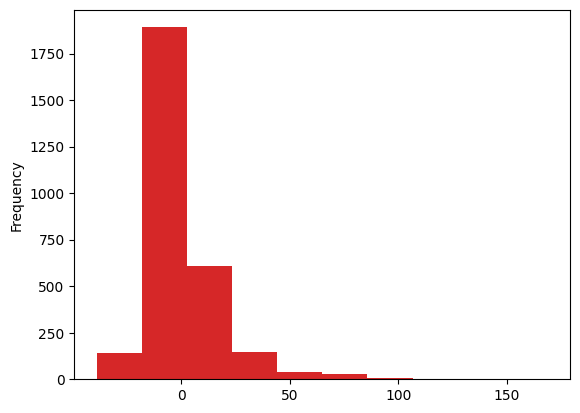

In [47]:
plt.hist((comp2022.actual['ACTUAL_ELAPSED_TIME'] - comp2022.actual['SCHEDULED_ELAPSED_TIME']))
plt.show()

/home/michael/code/recovair-abm/.venv/lib/python3.12/site-packages/pandas/core/groupby/grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
/home/michael/code/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 6 rows containing missing values.
/home/michael/code/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 2 rows containing missing values.
/home/michael/code/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.


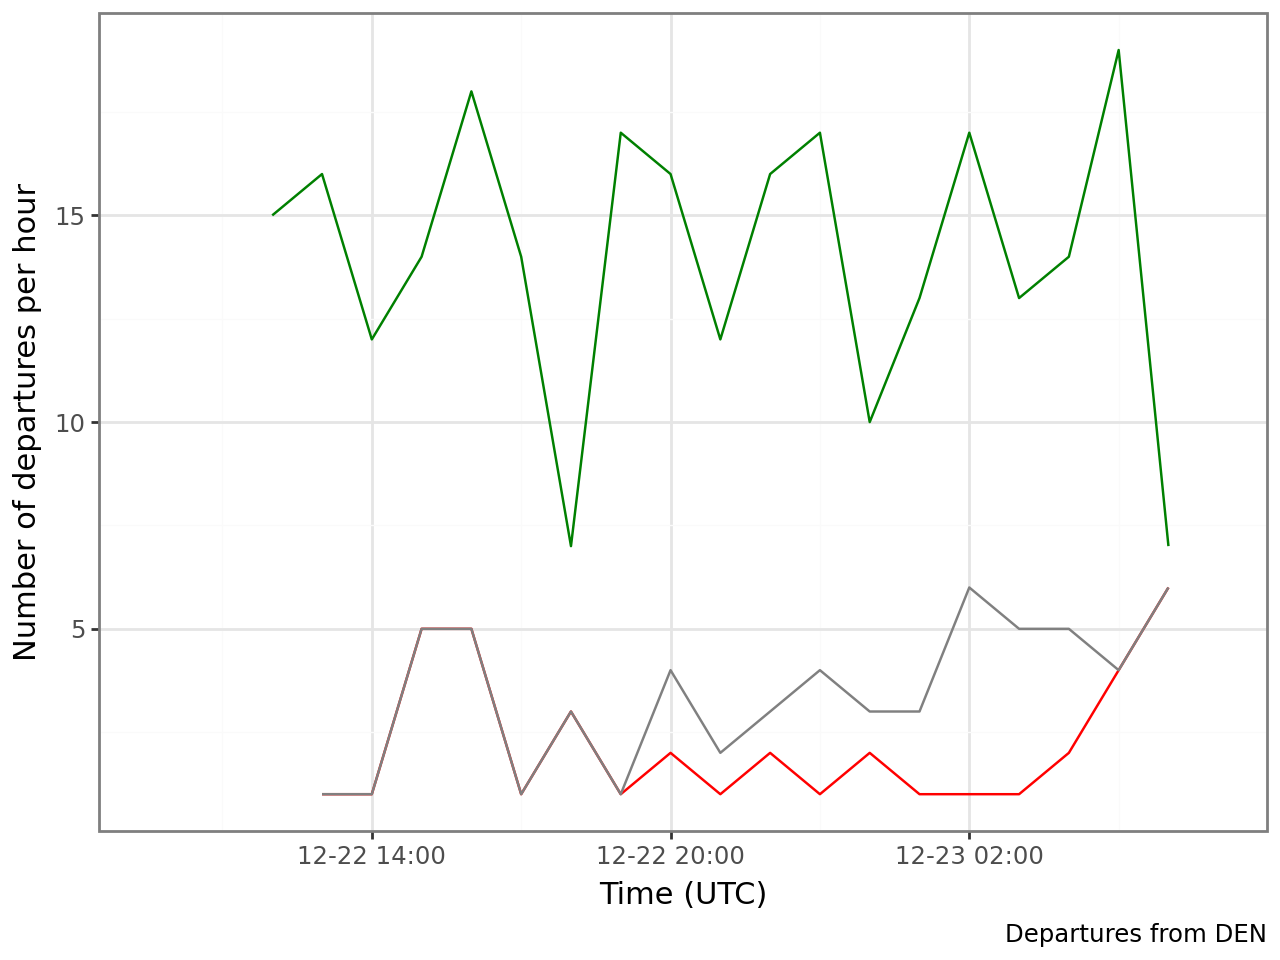

In [41]:
compare_dep_throughput_toggling_disruptions(comp2022.actual, comp2022.simulated, comp2022_nodisrupt.simulated, 'DEN')

In [42]:
for focus in ['DEN', 'MDW', 'DAL', 'SAN', 'DTW']:
    # co.pn.ggsave(compare_arr_throughput(comp, focus), f'plots/2022-nodisrupt-{focus}-arr-throughput.pdf', width=4, height=3)
    co.pn.ggsave(compare_arr_throughput_toggling_disruptions(comp2022.actual, comp2022.simulated, comp2022_nodisrupt.simulated, focus), f'plots/2022-{focus}-arr-throughput.pdf', width=4, height=3)
    co.pn.ggsave(compare_dep_throughput_toggling_disruptions(comp2022.actual, comp2022.simulated, comp2022_nodisrupt.simulated, focus), f'plots/2022-{focus}-dep-throughput.pdf', width=4, height=3)
# for focus in ['DEN', 'MDW', 'DAL', 'SAN', 'DTW']:
#     co.pn.ggsave(compare_arr_throughput(comps_2024[0], focus), f'plots/2024-{focus}-arr-throughput.pdf', width=4, height=3)
# for focus in ['DEN', 'MDW', 'DAL', 'SAN', 'DTW']:
#     co.pn.ggsave(compare_dep_throughput(comps_2022[0], focus), f'plots/2022-{focus}-dep-throughput.pdf', width=4, height=3)
for focus in ['DEN', 'MDW', 'DAL', 'SAN', 'DTW']:
    # co.pn.ggsave(compare_dep_throughput(comp, focus), f'plots/2022-nodisrupt-{focus}-dep-throughput.pdf', width=4, height=3)
    co.pn.ggsave(compare_arr_throughput_toggling_disruptions(comp2024.actual, comp2024.simulated, comp2024_nodisrupt.simulated, focus), f'plots/2024-{focus}-arr-throughput.pdf', width=4, height=3)
    co.pn.ggsave(compare_dep_throughput_toggling_disruptions(comp2024.actual, comp2024.simulated, comp2024_nodisrupt.simulated, focus), f'plots/2024-{focus}-dep-throughput.pdf', width=4, height=3)

/home/michael/code/recovair-abm/.venv/lib/python3.12/site-packages/pandas/core/groupby/grouper.py:381: FutureWarning: Dtype inference on a pandas object (Series, Index, ExtensionArray) is deprecated. The Index constructor will keep the original dtype in the future. Call `infer_objects` on the result to get the old behavior.
/home/michael/code/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/ggplot.py:606: PlotnineWarning: Saving 4 x 3 in image.
/home/michael/code/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/ggplot.py:607: PlotnineWarning: Filename: plots/2022-DEN-arr-throughput.pdf
/home/michael/code/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 5 rows containing missing values.
/home/michael/code/recovair-abm/.venv/lib/python3.12/site-packages/plotnine/geoms/geom_path.py:100: PlotnineWarning: geom_path: Removed 1 rows containing missing values.
/home/michael/code/recovair-abm/.venv/lib/python3.1

In [3]:
import timezonefinder as tzf
airport_coords = (
    pd.read_csv("../db/truth/T_MASTER_CORD.csv")
    .set_index("AIRPORT")
    .query("AIRPORT_IS_CLOSED < 1 and AIRPORT_IS_LATEST")[
        ["LATITUDE", "LONGITUDE", "DISPLAY_AIRPORT_NAME"]
    ]
)

def prep_bts(start_date, end_date, filename):
    finder = tzf.TimezoneFinder()
    flights = pd.read_csv(filename)
    flights = flights[flights['OP_UNIQUE_CARRIER'] == 'WN']

    flights["OriginTimezone"] = flights["ORIGIN"].map(
        lambda origin: finder.timezone_at(
            lng=airport_coords.LONGITUDE[origin], lat=airport_coords.LATITUDE[origin]
        )
    )
    flights["DestTimezone"] = flights["DEST"].map(
        lambda origin: finder.timezone_at(
            lng=airport_coords.LONGITUDE[origin], lat=airport_coords.LATITUDE[origin]
        )
    )
    flights["Div1Timezone"] = flights["DIV1_AIRPORT"].map(
        lambda div: None if pd.isna(div) else finder.timezone_at(
            lng=airport_coords.LONGITUDE[div], lat=airport_coords.LATITUDE[div]
        )
    )

    flights["FL_DATE"] = pd.to_datetime(flights["FL_DATE"])
    flights = flights[flights['FL_DATE'].between(start_date, end_date)]

    assert len(flights.index) > 0, 'empty flights dataframe! is the selected date range available in the selected dataset?'

    def dep_time_to_utc(row):
        hour = row["CRS_DEP_TIME"] // 100
        minute = row["CRS_DEP_TIME"] % 100
        date = row["FL_DATE"]
        local_ts = pd.Timestamp(
            year=date.year,
            month=date.month,
            day=date.day,
            hour=hour,
            minute=minute,
            tz=row["OriginTimezone"],
        )
        return local_ts.tz_convert("UTC")

    def arr_time_to_utc(row):
        hour = row["CRS_ARR_TIME"] // 100
        minute = row["CRS_ARR_TIME"] % 100
        # account for overnight flights
        date = row["FL_DATE"] + (pd.Timedelta(seconds=0) if row["CRS_ARR_TIME"] > row["CRS_DEP_TIME"] - 400 else pd.Timedelta(days=1))
        local_ts = pd.Timestamp(
            year=date.year,
            month=date.month,
            day=date.day,
            hour=hour,
            minute=minute,
            tz=row["DestTimezone"],
        )
        return local_ts.tz_convert("UTC")

    flights["ScheduledDepTimeUTC"] = flights.apply(dep_time_to_utc, axis=1)
    flights["ScheduledDepDateUTC"] = flights["ScheduledDepTimeUTC"].dt.date
    flights["ScheduledDepHourUTC"] = flights["ScheduledDepTimeUTC"].dt.hour
    flights["ScheduledDepTimePacific"] = flights["ScheduledDepTimeUTC"].dt.tz_convert(
        "America/Los_Angeles"
    )
    flights["ScheduledDepDatePacific"] = flights["ScheduledDepTimePacific"].dt.date
    flights["ScheduledDepHourPacific"] = flights["ScheduledDepTimePacific"].dt.hour
    flights["ScheduledArrTimeUTC"] = flights.apply(arr_time_to_utc, axis=1)
    flights["ScheduledArrDateUTC"] = flights["ScheduledArrTimeUTC"].dt.date
    flights["ScheduledArrHourUTC"] = flights["ScheduledArrTimeUTC"].dt.hour
    flights["ScheduledArrTimePacific"] = flights["ScheduledArrTimeUTC"].dt.tz_convert(
        "America/Los_Angeles"
    )
    flights["ScheduledArrDatePacific"] = flights["ScheduledArrTimePacific"].dt.date
    flights["ScheduledArrHourPacific"] = flights["ScheduledArrTimePacific"].dt.hour

    def get_actual_dep_time(row):
        if pd.isna(row['DEP_DELAY']):
            return pd.NA
        return row['ScheduledDepTimeUTC'] + pd.Timedelta(minutes=row['DEP_DELAY'])
    
    def get_actual_arr_time(row):
        if pd.isna(row['ARR_DELAY']):
            return pd.NA
        return row['ScheduledArrTimeUTC'] + pd.Timedelta(minutes=row['ARR_DELAY'])

    def get_optional_hour(row):
        if pd.isna(row):
            return pd.NA
        return row.hour
    
    flights['ActualDepTimeUTC'] = flights.apply(get_actual_dep_time, axis=1)
    flights['ActualArrTimeUTC'] = flights.apply(get_actual_arr_time, axis=1)

    flights['ActualDepHourUTC'] = flights['ActualDepTimeUTC'].apply(get_optional_hour)
    flights['ActualArrHourUTC'] = flights['ActualArrTimeUTC'].apply(get_optional_hour)

    return flights
real_df = prep_bts('2024-01-28', '2024-01-28', '../db/truth/T_ONTIME_REPORTING_2024.csv')
real_df.reset_index(names='id', inplace=True)
real_df

/var/folders/m6/jbwjsxrx6ss_63r93c4r01980000gn/T/ipykernel_88164/2918991510.py:31: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.


,id,FL_DATE,OP_UNIQUE_CARRIER,TAIL_NUM,OP_CARRIER_FL_NUM,ORIGIN,DEST,CRS_DEP_TIME,DEP_TIME,DEP_DELAY,...,ScheduledArrTimeUTC,ScheduledArrDateUTC,ScheduledArrHourUTC,ScheduledArrTimePacific,ScheduledArrDatePacific,ScheduledArrHourPacific,ActualDepTimeUTC,ActualArrTimeUTC,ActualDepHourUTC,ActualArrHourUTC
0,491135,2024-01-28,WN,N1801U,1722,PHX,STL,1900,1917.0,17.0,...,2024-01-29 04:50:00+00:00,2024-01-29,4,2024-01-28 20:50:00-08:00,2024-01-28,20,2024-01-29 02:17:00+00:00,2024-01-29 05:03:00+00:00,2,5
1,491136,2024-01-28,WN,N1801U,2037,MDW,PHX,1515,1552.0,37.0,...,2024-01-29 01:15:00+00:00,2024-01-29,1,2024-01-28 17:15:00-08:00,2024-01-28,17,2024-01-28 21:52:00+00:00,2024-01-29 01:21:00+00:00,21,1
2,491137,2024-01-28,WN,N1801U,2837,LAS,MDW,900,928.0,28.0,...,2024-01-28 20:30:00+00:00,2024-01-28,20,2024-01-28 12:30:00-08:00,2024-01-28,12,2024-01-28 17:28:00+00:00,2024-01-28 20:55:00+00:00,17,20
3,491138,2024-01-28,WN,N1802U,1133,ITO,HNL,845,837.0,-8.0,...,2024-01-28 19:40:00+00:00,2024-01-28,19,2024-01-28 11:40:00-08:00,2024-01-28,11,2024-01-28 18:37:00+00:00,2024-01-28 19:31:00+00:00,18,19
4,491139,2024-01-28,WN,N1802U,1567,ITO,HNL,1215,1204.0,-11.0,...,2024-01-28 23:15:00+00:00,2024-01-28,23,2024-01-28 15:15:00-08:00,2024-01-28,15,2024-01-28 22:04:00+00:00,2024-01-28 23:04:00+00:00,22,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,495071,2024-01-28,WN,N969WN,1247,DAL,LAX,600,555.0,-5.0,...,2024-01-28 15:25:00+00:00,2024-01-28,15,2024-01-28 07:25:00-08:00,2024-01-28,7,2024-01-28 11:55:00+00:00,2024-01-28 15:19:00+00:00,11,15
3937,495072,2024-01-28,WN,N969WN,1247,LAX,SFO,800,759.0,-1.0,...,2024-01-28 17:25:00+00:00,2024-01-28,17,2024-01-28 09:25:00-08:00,2024-01-28,9,2024-01-28 15:59:00+00:00,2024-01-28 17:27:00+00:00,15,17
3938,495073,2024-01-28,WN,N969WN,1247,SFO,DEN,1000,1007.0,7.0,...,2024-01-28 20:25:00+00:00,2024-01-28,20,2024-01-28 12:25:00-08:00,2024-01-28,12,2024-01-28 18:07:00+00:00,2024-01-28 20:27:00+00:00,18,20
3939,495074,2024-01-28,WN,N969WN,562,DEN,IAD,1410,1437.0,27.0,...,2024-01-29 00:15:00+00:00,2024-01-29,0,2024-01-28 16:15:00-08:00,2024-01-28,16,2024-01-28 21:37:00+00:00,2024-01-29 00:44:00+00:00,21,0


In [4]:
sim_df['arr_time'] = pd.to_datetime(sim_df['arr_time'], utc=True)
sim_df['sched_arr'] = pd.to_datetime(sim_df['sched_arr'], utc=True)
sim_df['sched_dep'] = pd.to_datetime(sim_df['sched_dep'], utc=True)
sim_df['dep_time'] = pd.to_datetime(sim_df['dep_time'], utc=True)
sim_df['DEP_DELAY'] = (sim_df['dep_time'] - sim_df['sched_dep']).dt.total_seconds() // 60

In [5]:
oc = co.OutcomeComparison(real_df, sim_df)

In [6]:
sim_df['dep_hour'] = sim_df['dep_time'].dt.hour
# real_df['DepHourOrd'] = (real_df['ActualDepTimeUTC'] - real_df['ScheduledDepTimeUTC'].min()).dt.total_seconds() // 3600

<Axes: xlabel='ActualDepHourUTC'>

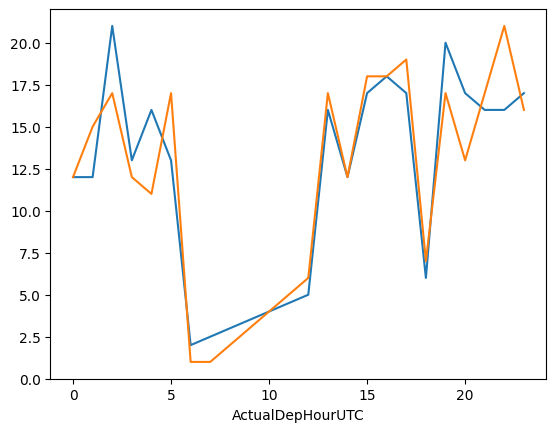

In [9]:
sim_df[sim_df['origin'] == 'DEN'].groupby('dep_hour')['origin'].count().plot.line()
real_df[real_df['ORIGIN'] == 'DEN'].groupby('ActualDepHourUTC')['ORIGIN'].count().plot.line()

<Axes: xlabel='ActualDepHourUTC'>

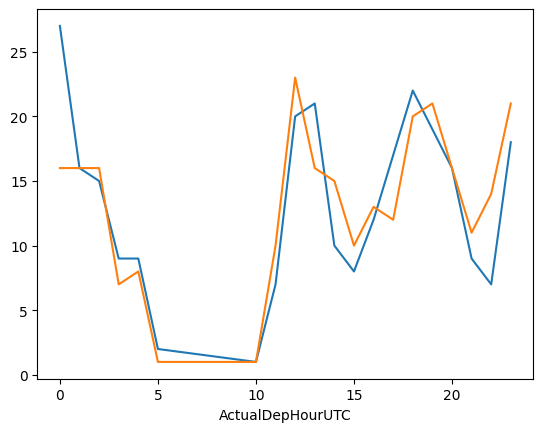

In [10]:
sim_df[sim_df['dest'] == 'DEN'].groupby('dep_hour')['origin'].count().plot.line()
real_df[real_df['DEST'] == 'DEN'].groupby('ActualDepHourUTC')['ORIGIN'].count().plot.line()

/opt/homebrew/lib/python3.11/site-packages/plotnine/layer.py:364: PlotnineWarning: geom_point : Removed 14 rows containing missing values.


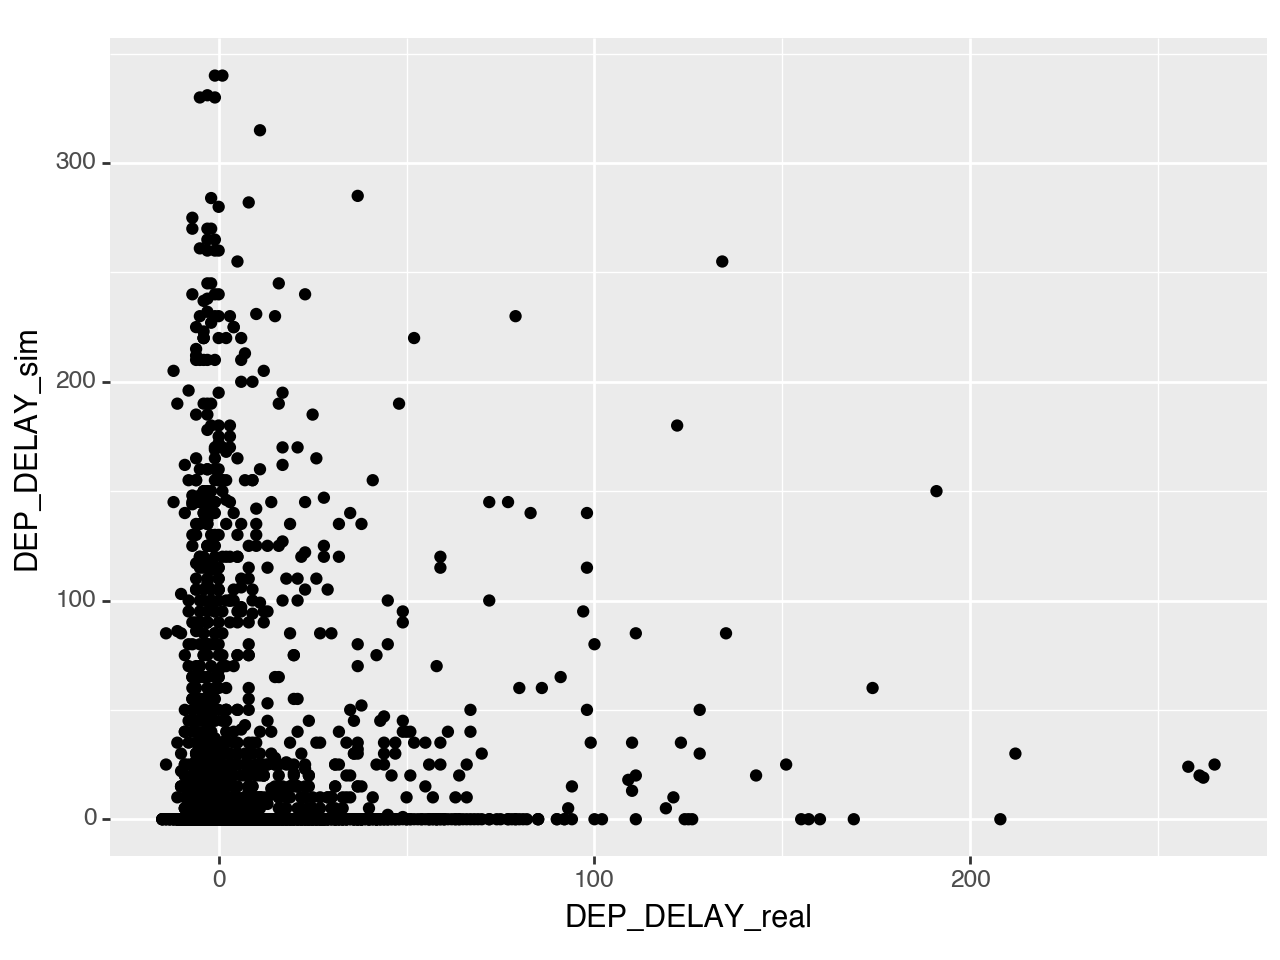

<Figure Size: (640 x 480)>

In [11]:
co.pn.ggplot(pd.merge(real_df, sim_df, on='id', suffixes=['_real', '_sim'])) + co.pn.geom_point(co.pn.aes(x='DEP_DELAY_real', y='DEP_DELAY_sim'))

<Axes: >

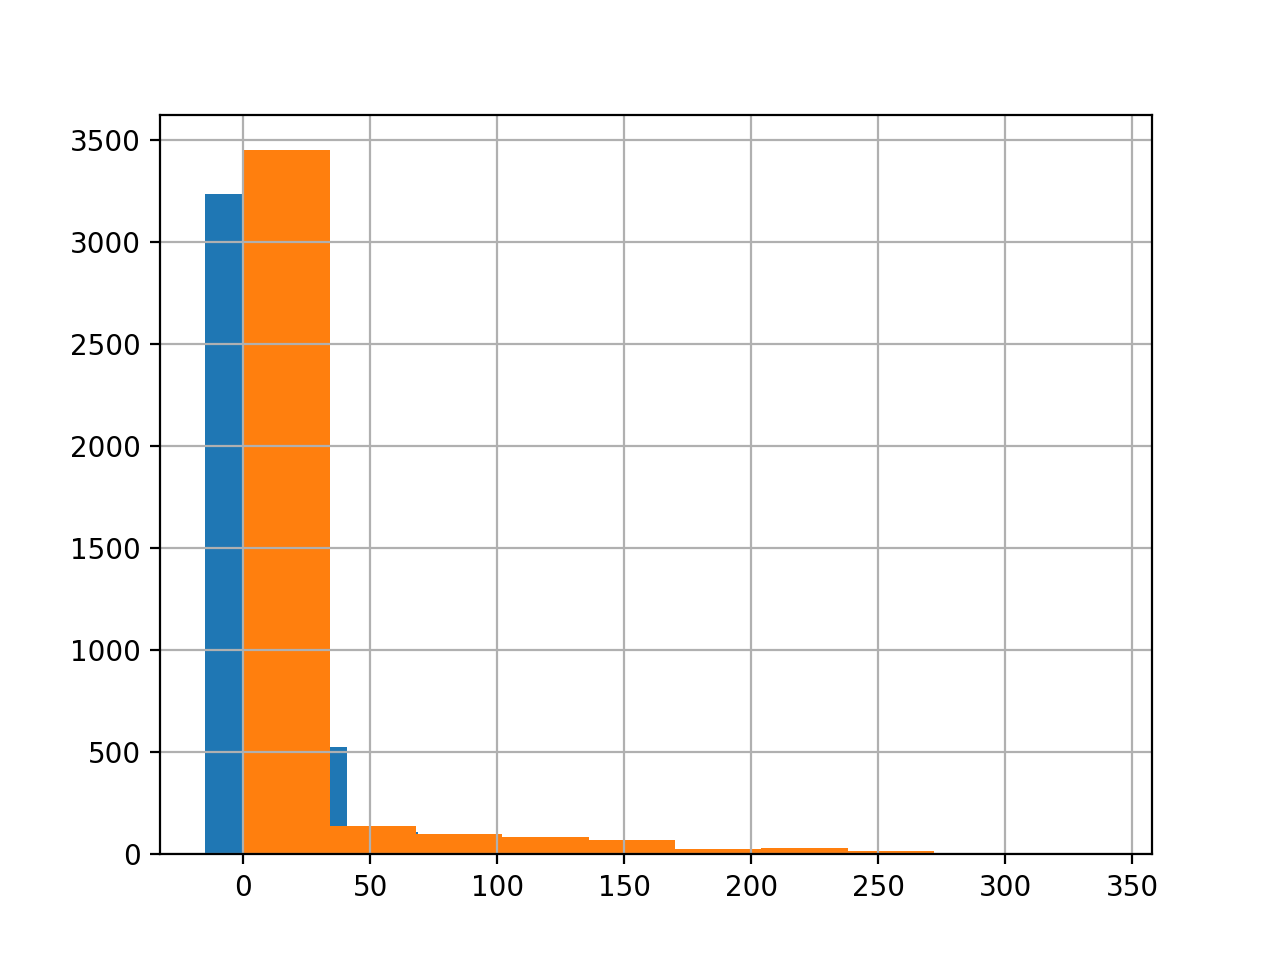

In [12]:
real_df['DEP_DELAY'].hist()
sim_df['DEP_DELAY'].hist()

In [13]:
oc.compare_otp()

{'actual': 0.8657701091093631, 'sim': 0.8102004567368688}

In [15]:
(oc.actual['DEP_DELAY'].sum(),
 oc.simulated['DEP_DELAY'].sum())

(21528.0, 62473.0)

In [8]:
all_df = pd.merge(sim_df, real_df, left_on='id', right_on='flight_id', suffixes=['sim', 'real'])
all_df

,id,flight_number,tail,crew,passengers,origin,dest,cancelled,dep_time,arr_time,...,ScheduledDepDatePacific,ScheduledDepHourPacific,ScheduledArrTimeUTC,ScheduledArrDateUTC,ScheduledArrHourUTC,ScheduledArrTimePacific,ScheduledArrDatePacific,ScheduledArrHourPacific,ActualDepTimeUTC,ActualArrTimeUTC
0,492728,1560,N791SW,837.0,143,SNA,SMF,0,2024-01-28 15:45:00,2024-01-28 17:30:00,...,2024-01-28,7,2024-01-28 17:30:00+00:00,2024-01-28,17,2024-01-28 09:30:00-08:00,2024-01-28,9,2024-01-28 15:42:00+00:00,2024-01-28 17:14:00+00:00
1,492003,1592,N473WN,701.0,143,SMF,LAX,0,2024-01-28 17:10:00,2024-01-28 18:40:00,...,2024-01-28,9,2024-01-28 18:40:00+00:00,2024-01-28,18,2024-01-28 10:40:00-08:00,2024-01-28,10,2024-01-28 17:24:00+00:00,2024-01-28 18:40:00+00:00
2,492310,1623,N7732A,6.0,0,SJC,SAN,0,2024-01-29 01:40:00,2024-01-29 03:05:00,...,2024-01-28,17,2024-01-29 03:05:00+00:00,2024-01-29,3,2024-01-28 19:05:00-08:00,2024-01-28,19,2024-01-29 01:38:00+00:00,2024-01-29 03:09:00+00:00
3,492572,2015,N7859B,94.0,126,LAS,TUS,0,2024-01-28 23:25:00,2024-01-29 00:45:00,...,2024-01-28,15,2024-01-29 00:45:00+00:00,2024-01-29,0,2024-01-28 16:45:00-08:00,2024-01-28,16,2024-01-28 23:25:00+00:00,2024-01-29 00:34:00+00:00
4,492826,262,N8323C,201.0,144,MCO,IND,0,2024-01-28 22:30:00,2024-01-29 01:00:00,...,2024-01-28,14,2024-01-29 01:00:00+00:00,2024-01-29,1,2024-01-28 17:00:00-08:00,2024-01-28,17,2024-01-28 22:38:00+00:00,2024-01-29 01:28:00+00:00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3936,492434,1469,N7822A,631.0,0,MDW,MEM,0,2024-01-28 22:35:00,2024-01-29 00:25:00,...,2024-01-28,14,2024-01-29 00:25:00+00:00,2024-01-29,0,2024-01-28 16:25:00-08:00,2024-01-28,16,2024-01-28 22:35:00+00:00,2024-01-29 00:03:00+00:00
3937,492737,574,N793SA,427.0,0,DEN,BUR,0,2024-01-29 03:20:00,2024-01-29 05:55:00,...,2024-01-28,19,2024-01-29 05:55:00+00:00,2024-01-29,5,2024-01-28 21:55:00-08:00,2024-01-28,21,2024-01-29 03:20:00+00:00,2024-01-29 05:40:00+00:00
3938,494615,1776,N8893L,1370.0,175,MCO,MDW,0,2024-01-28 16:15:00,2024-01-28 19:10:00,...,2024-01-28,8,2024-01-28 19:10:00+00:00,2024-01-28,19,2024-01-28 11:10:00-08:00,2024-01-28,11,2024-01-28 16:20:00+00:00,2024-01-28 18:56:00+00:00
3939,492530,1290,N7849A,399.0,143,LAX,DEN,0,2024-01-28 20:10:00,2024-01-28 22:30:00,...,2024-01-28,12,2024-01-28 22:30:00+00:00,2024-01-28,22,2024-01-28 14:30:00-08:00,2024-01-28,14,2024-01-28 20:07:00+00:00,2024-01-28 22:15:00+00:00


In [9]:
for key in ['dep_time', 'arr_time', 'sched_dep', 'sched_arr']:
    all_df[key] = pd.to_datetime(all_df[key], utc=True)

In [10]:
all_df['sched_dep']

0      2024-01-28 15:45:00+00:00
1      2024-01-28 17:10:00+00:00
2      2024-01-29 01:40:00+00:00
3      2024-01-28 23:25:00+00:00
4      2024-01-28 22:30:00+00:00
                  ...           
3936   2024-01-28 22:35:00+00:00
3937   2024-01-29 03:20:00+00:00
3938   2024-01-28 16:15:00+00:00
3939   2024-01-28 20:10:00+00:00
3940   2024-01-28 12:25:00+00:00
Name: sched_dep, Length: 3941, dtype: datetime64[ns, UTC]

In [11]:
all_df['sim_dep_delay'] = (all_df['dep_time'] - all_df['sched_dep']).dt.total_seconds() / 60

In [12]:
all_df['sim_dep_delay'].sum()

3410.0

In [13]:
all_df['DEP_DELAY'].sum()

21528.0

In [14]:
all_df.columns

Index(['id', 'flight_number', 'tail', 'crew', 'passengers', 'origin', 'dest',
       'cancelled', 'dep_time', 'arr_time', 'sched_dep', 'sched_arr',
       'flight_id', 'FL_DATE', 'OP_UNIQUE_CARRIER', 'TAIL_NUM',
       'OP_CARRIER_FL_NUM', 'ORIGIN', 'DEST', 'CRS_DEP_TIME', 'DEP_TIME',
       'DEP_DELAY', 'WHEELS_OFF', 'WHEELS_ON', 'CRS_ARR_TIME', 'ARR_TIME',
       'ARR_DELAY', 'CANCELLED', 'CANCELLATION_CODE', 'DIVERTED',
       'CRS_ELAPSED_TIME', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY',
       'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'DIV1_AIRPORT',
       'DIV1_WHEELS_ON', 'OriginTimezone', 'DestTimezone', 'Div1Timezone',
       'ScheduledDepTimeUTC', 'ScheduledDepDateUTC', 'ScheduledDepHourUTC',
       'ScheduledDepTimePacific', 'ScheduledDepDatePacific',
       'ScheduledDepHourPacific', 'ScheduledArrTimeUTC', 'ScheduledArrDateUTC',
       'ScheduledArrHourUTC', 'ScheduledArrTimePacific',
       'ScheduledArrDatePacific', 'ScheduledArrHourPacific',
       'ActualDepTimeUTC'

In [15]:
all_df[(all_df['sim_dep_delay'] - all_df['DEP_DELAY']).abs() > 30]\
    [['id', 'flight_number', 'tail', 'origin', 'dest', 'sched_dep', 'dep_time', 'ActualDepTimeUTC', 'sim_dep_delay', 'DEP_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY']]\
    .sort_values('DEP_DELAY')

,id,flight_number,tail,origin,dest,sched_dep,dep_time,ActualDepTimeUTC,sim_dep_delay,DEP_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY
3171,493562,1414,N8668A,AMA,DAL,2024-01-29 01:35:00+00:00,2024-01-29 06:05:00+00:00,2024-01-29 01:26:00+00:00,270.0,-9.0,NaN,NaN,NaN,NaN,NaN
1927,491480,2244,N259WN,CHS,BNA,2024-01-29 01:10:00+00:00,2024-01-29 01:45:00+00:00,2024-01-29 01:03:00+00:00,35.0,-7.0,NaN,NaN,NaN,NaN,NaN
2307,492422,1246,N7819A,BWI,DEN,2024-01-29 01:55:00+00:00,2024-01-29 03:45:00+00:00,2024-01-29 01:50:00+00:00,110.0,-5.0,NaN,NaN,NaN,NaN,NaN
482,491521,2880,N266WN,STL,PHX,2024-01-28 17:10:00+00:00,2024-01-28 17:45:00+00:00,2024-01-28 17:05:00+00:00,35.0,-5.0,NaN,NaN,NaN,NaN,NaN
2696,494377,3814,N8849Q,MDW,DEN,2024-01-29 01:25:00+00:00,2024-01-29 03:20:00+00:00,2024-01-29 01:20:00+00:00,115.0,-5.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
815,492348,2921,N773SA,TPA,ATL,2024-01-28 19:15:00+00:00,2024-01-28 19:15:00+00:00,2024-01-28 22:47:00+00:00,0.0,212.0,11.0,0.0,0.0,0.0,193.0
1385,492261,2683,N7715E,PHX,BUF,2024-01-28 18:00:00+00:00,2024-01-28 18:15:00+00:00,2024-01-28 22:18:00+00:00,15.0,258.0,258.0,0.0,5.0,0.0,0.0
372,494770,1666,N7833A,RSW,IND,2024-01-29 00:55:00+00:00,2024-01-29 00:55:00+00:00,2024-01-29 05:16:00+00:00,0.0,261.0,0.0,0.0,0.0,0.0,260.0
289,492260,2683,N7715E,BUF,FLL,2024-01-28 22:35:00+00:00,2024-01-28 22:45:00+00:00,2024-01-29 02:57:00+00:00,10.0,262.0,0.0,0.0,0.0,0.0,254.0


## Case Study: `N7715E`

- Actual path: DEN -> PHX -> BUF -> FLL
- Simulated path: PHX -> BUF -> FLL
  - DEN -> PHX was executed by `N564WN` instead from 1930Z to 2130Z on 01-28 (SWA1764)
  - `N564WN` actually flew from `LIR` (Liberia, Costa Rica) into Denver and arrived at around 1925Z
  - Case in point: Lack of international flights at the source contributes to discrepancies in schedule execution

In [16]:
all_df.query('tail != TAIL_NUM').shape

(55, 56)

55 out of 3941 flights were executed with a different aircraft than the actual planned aircraft in the simulation.

In [17]:
all_df.query('flight_number == 1764')

,id,flight_number,tail,crew,passengers,origin,dest,cancelled,dep_time,arr_time,...,ScheduledDepHourPacific,ScheduledArrTimeUTC,ScheduledArrDateUTC,ScheduledArrHourUTC,ScheduledArrTimePacific,ScheduledArrDatePacific,ScheduledArrHourPacific,ActualDepTimeUTC,ActualArrTimeUTC,sim_dep_delay
1009,492259,1764,N564WN,252.0,175,DEN,PHX,0,2024-01-28 19:30:00+00:00,2024-01-28 21:30:00+00:00,...,11,2024-01-28 21:30:00+00:00,2024-01-28,21,2024-01-28 13:30:00-08:00,2024-01-28,13,2024-01-28 19:31:00+00:00,2024-01-28 21:18:00+00:00,0.0
3894,491246,1764,N211WN,28.0,143,PHX,SJC,0,2024-01-28 22:55:00+00:00,2024-01-29 00:50:00+00:00,...,14,2024-01-29 00:05:00+00:00,2024-01-29,0,2024-01-28 16:05:00-08:00,2024-01-28,16,2024-01-28 22:59:00+00:00,2024-01-29 00:40:00+00:00,45.0


In [18]:
all_df.query('tail == "N7819A"').sort_values('ScheduledDepTimeUTC')[['id', 'flight_number', 'tail', 'origin', 'dest', 'sched_dep', 'dep_time', 'ActualDepTimeUTC', 'arr_time', 'ActualArrTimeUTC', 'sim_dep_delay', 'DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'TAIL_NUM']]

,id,flight_number,tail,origin,dest,sched_dep,dep_time,ActualDepTimeUTC,arr_time,ActualArrTimeUTC,sim_dep_delay,DEP_DELAY,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,TAIL_NUM
1472,492421,1197,N7819A,TPA,HOU,2024-01-28 11:30:00+00:00,2024-01-28 11:30:00+00:00,2024-01-28 11:26:00+00:00,2024-01-28 13:55:00+00:00,2024-01-28 13:44:00+00:00,0.0,-4.0,-11.0,NaN,NaN,NaN,NaN,NaN,N7819A
1011,492564,3461,N7819A,HOU,BWI,2024-01-29 00:25:00+00:00,2024-01-29 00:25:00+00:00,2024-01-29 00:29:00+00:00,2024-01-29 03:10:00+00:00,2024-01-29 03:18:00+00:00,0.0,4.0,8.0,NaN,NaN,NaN,NaN,NaN,N7857B
2307,492422,1246,N7819A,BWI,DEN,2024-01-29 01:55:00+00:00,2024-01-29 03:45:00+00:00,2024-01-29 01:50:00+00:00,2024-01-29 08:05:00+00:00,2024-01-29 05:45:00+00:00,110.0,-5.0,-30.0,NaN,NaN,NaN,NaN,NaN,N7819A


In [19]:
all_df.query('TAIL_NUM == "N7819A"').sort_values('ScheduledDepTimeUTC')[['id', 'flight_number', 'tail', 'origin', 'dest', 'sched_dep', 'dep_time', 'ActualDepTimeUTC', 'arr_time', 'ActualArrTimeUTC', 'sim_dep_delay', 'DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'TAIL_NUM']]

,id,flight_number,tail,origin,dest,sched_dep,dep_time,ActualDepTimeUTC,arr_time,ActualArrTimeUTC,sim_dep_delay,DEP_DELAY,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,TAIL_NUM
1472,492421,1197,N7819A,TPA,HOU,2024-01-28 11:30:00+00:00,2024-01-28 11:30:00+00:00,2024-01-28 11:26:00+00:00,2024-01-28 13:55:00+00:00,2024-01-28 13:44:00+00:00,0.0,-4.0,-11.0,NaN,NaN,NaN,NaN,NaN,N7819A
2307,492422,1246,N7819A,BWI,DEN,2024-01-29 01:55:00+00:00,2024-01-29 03:45:00+00:00,2024-01-29 01:50:00+00:00,2024-01-29 08:05:00+00:00,2024-01-29 05:45:00+00:00,110.0,-5.0,-30.0,NaN,NaN,NaN,NaN,NaN,N7819A


In [20]:
all_df.query('tail == "N7857B"').sort_values('ScheduledDepTimeUTC')[['id', 'flight_number', 'tail', 'origin', 'dest', 'sched_dep', 'dep_time', 'ActualDepTimeUTC', 'arr_time', 'ActualArrTimeUTC', 'sim_dep_delay', 'DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'TAIL_NUM']]

,id,flight_number,tail,origin,dest,sched_dep,dep_time,ActualDepTimeUTC,arr_time,ActualArrTimeUTC,sim_dep_delay,DEP_DELAY,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,TAIL_NUM
2390,492563,102,N7857B,ELP,DEN,2024-01-28 13:15:00+00:00,2024-01-28 13:15:00+00:00,2024-01-28 13:14:00+00:00,2024-01-28 15:10:00+00:00,2024-01-28 14:57:00+00:00,0.0,-1.0,-13.0,NaN,NaN,NaN,NaN,NaN,N7857B
466,491294,3235,N7857B,DEN,PIT,2024-01-29 01:30:00+00:00,2024-01-29 01:30:00+00:00,2024-01-29 01:49:00+00:00,2024-01-29 04:20:00+00:00,2024-01-29 04:57:00+00:00,0.0,19.0,37.0,19.0,0.0,18.0,0.0,0.0,N221WN


In [21]:
all_df.query('TAIL_NUM == "N7857B"').sort_values('ScheduledDepTimeUTC')[['id', 'flight_number', 'tail', 'origin', 'dest', 'sched_dep', 'dep_time', 'ActualDepTimeUTC', 'arr_time', 'ActualArrTimeUTC', 'sim_dep_delay', 'DEP_DELAY', 'ARR_DELAY', 'CARRIER_DELAY', 'WEATHER_DELAY', 'NAS_DELAY', 'SECURITY_DELAY', 'LATE_AIRCRAFT_DELAY', 'TAIL_NUM']]

,id,flight_number,tail,origin,dest,sched_dep,dep_time,ActualDepTimeUTC,arr_time,ActualArrTimeUTC,sim_dep_delay,DEP_DELAY,ARR_DELAY,CARRIER_DELAY,WEATHER_DELAY,NAS_DELAY,SECURITY_DELAY,LATE_AIRCRAFT_DELAY,TAIL_NUM
2390,492563,102,N7857B,ELP,DEN,2024-01-28 13:15:00+00:00,2024-01-28 13:15:00+00:00,2024-01-28 13:14:00+00:00,2024-01-28 15:10:00+00:00,2024-01-28 14:57:00+00:00,0.0,-1.0,-13.0,NaN,NaN,NaN,NaN,NaN,N7857B
1011,492564,3461,N7819A,HOU,BWI,2024-01-29 00:25:00+00:00,2024-01-29 00:25:00+00:00,2024-01-29 00:29:00+00:00,2024-01-29 03:10:00+00:00,2024-01-29 03:18:00+00:00,0.0,4.0,8.0,NaN,NaN,NaN,NaN,NaN,N7857B


## Case study: `N7819A` and `492422`

Causal chain:
- `491295` (SWA3851, MTJ-DEN, N221WN) cancelled due to **crew shortage**
- `491294` (SWA3235, DEN-PIT, N221WN) executed with N7857B instead in the simulation (consumed N7857B because N221WN was cancelled)
- **N7819A actually executed HOU-LIR, LIR-BWI; escaped dataset for being overseas**
- **N7857B actually executed DEN-PVR, PVR-HOU; escaped dataset for being overseas**
- `492564` (SWA3461, HOU-BWI, N7857B) executed with N7819A instead in the simulation (consumed N7819A because N7857B was consumed)
- `492422` (SWA1246, BWI-DEN, N7819A) got delayed because N7819A arrived late from HOU

<Axes: >

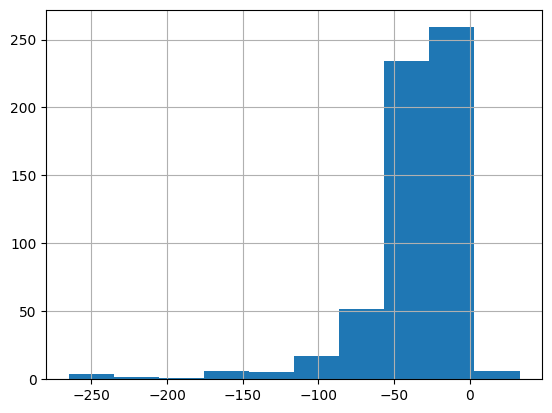

In [22]:
delayed_df = all_df[all_df.DEP_DELAY > 15]
((delayed_df['sim_dep_delay'] - delayed_df['DEP_DELAY'])).hist()

In [24]:
delayed_df = delayed_df.copy()
delayed_df['sim_minus_irl'] = delayed_df['sim_dep_delay'] - delayed_df['DEP_DELAY']

In [27]:
delayed_df[delayed_df['sim_minus_irl'] < -30]

,id,flight_number,tail,crew,passengers,origin,dest,cancelled,dep_time,arr_time,...,ScheduledArrTimeUTC,ScheduledArrDateUTC,ScheduledArrHourUTC,ScheduledArrTimePacific,ScheduledArrDatePacific,ScheduledArrHourPacific,ActualDepTimeUTC,ActualArrTimeUTC,sim_dep_delay,sim_minus_irl
12,494152,1281,N8806Q,407.0,1,AUS,FLL,0,2024-01-29 01:25:00+00:00,2024-01-29 03:55:00+00:00,...,2024-01-29 03:55:00+00:00,2024-01-29,3,2024-01-28 19:55:00-08:00,2024-01-28,19,2024-01-29 02:14:00+00:00,2024-01-29 04:40:00+00:00,0.0,-49.0
17,491390,1898,N241WN,773.0,132,DCA,BNA,0,2024-01-28 17:25:00+00:00,2024-01-28 19:30:00+00:00,...,2024-01-28 18:40:00+00:00,2024-01-28,18,2024-01-28 10:40:00-08:00,2024-01-28,10,2024-01-28 18:43:00+00:00,2024-01-28 20:16:00+00:00,50.0,-78.0
30,491169,824,N1808U,159.0,0,LAS,LGB,0,2024-01-29 01:15:00+00:00,2024-01-29 02:25:00+00:00,...,2024-01-29 02:25:00+00:00,2024-01-29,2,2024-01-28 18:25:00-08:00,2024-01-28,18,2024-01-29 02:55:00+00:00,2024-01-29 03:53:00+00:00,0.0,-100.0
42,493429,3080,N8639B,969.0,26,TPA,PHX,0,2024-01-28 23:55:00+00:00,2024-01-29 04:40:00+00:00,...,2024-01-29 04:40:00+00:00,2024-01-29,4,2024-01-28 20:40:00-08:00,2024-01-28,20,2024-01-29 00:50:00+00:00,2024-01-29 05:17:00+00:00,0.0,-55.0
62,494276,2413,N8830Q,148.0,0,MIA,MSY,0,2024-01-28 23:45:00+00:00,2024-01-29 01:55:00+00:00,...,2024-01-29 01:00:00+00:00,2024-01-29,1,2024-01-28 17:00:00-08:00,2024-01-28,17,2024-01-29 00:54:00+00:00,2024-01-29 03:15:00+00:00,55.0,-69.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3840,494740,2727,N902WN,1231.0,143,BWI,MIA,0,2024-01-28 19:15:00+00:00,2024-01-28 21:55:00+00:00,...,2024-01-28 21:55:00+00:00,2024-01-28,21,2024-01-28 13:55:00-08:00,2024-01-28,13,2024-01-28 19:47:00+00:00,2024-01-28 22:46:00+00:00,0.0,-32.0
3845,492258,1076,N7713A,1289.0,0,PHX,HOU,0,2024-01-29 02:00:00+00:00,2024-01-29 04:20:00+00:00,...,2024-01-29 04:20:00+00:00,2024-01-29,4,2024-01-28 20:20:00-08:00,2024-01-28,20,2024-01-29 03:23:00+00:00,2024-01-29 05:41:00+00:00,0.0,-83.0
3862,494462,3638,N8863Q,906.0,56,OAK,BOI,0,2024-01-29 03:50:00+00:00,2024-01-29 05:25:00+00:00,...,2024-01-29 05:25:00+00:00,2024-01-29,5,2024-01-28 21:25:00-08:00,2024-01-28,21,2024-01-29 04:49:00+00:00,2024-01-29 06:19:00+00:00,0.0,-59.0
3871,491393,3023,N241WN,685.0,0,OAK,BUR,0,2024-01-29 03:05:00+00:00,2024-01-29 04:15:00+00:00,...,2024-01-29 04:10:00+00:00,2024-01-29,4,2024-01-28 20:10:00-08:00,2024-01-28,20,2024-01-29 03:59:00+00:00,2024-01-29 05:03:00+00:00,5.0,-54.0


273 out of 3941 flights (about 7%) had an eventual simulated departure delay that was different from the actual departure delay by more than 30 minutes.

In [35]:
((all_df['dep_time'] - all_df['ActualDepTimeUTC']).dt.total_seconds() / 60).describe()

count    3939.000000
mean       -4.599137
std        20.038587
min      -265.000000
25%        -7.000000
50%         1.000000
75%         5.000000
max       120.000000
dtype: float64